# Lab 3: Visualization

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [4]:
# Define matplotlib plots and pandas output
font = {'size': 25}

matplotlib.rc('font', **font)
resize_value = 2.5
matplotlib.rcParams['figure.figsize'] = (resize_value*6.4, resize_value*4.8)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

### Import data

In [5]:
# Read the "movies.txt" file into a Pandas DataFrame
md = pd.read_csv("movies.txt", sep=",")

# Display the first few rows of the DataFrame
print(md.head(n=10))
print('\n')

# Get summary statistics of the DataFrame
print(md.describe())  # Q: Are genre descriptions correct?
print('\n')

# Check the data types of columns
print(md.dtypes)

                        title  year  length      budget  rating  votes    r1    r2   r3    r4    r5    r6    r7    r8    r9   r10   mpaa  Action  Animation  Comedy  Drama  Documentary  Romance  Short
0                     $windle  2002      93         NaN    5.30    200  4.50  0.00 4.50  4.50 24.50 24.50 14.50  4.50  4.50 14.50      R       1          0       0      1            0        0      0
1                'A' gai waak  1983     106         NaN    7.10   1259  4.50  4.50 4.50  4.50  4.50 14.50 14.50 14.50 14.50 24.50  PG-13       1          0       1      0            0        0      0
2       'A' gai waak juk jaap  1987     101         NaN    7.20    614  4.50  4.50 4.50  4.50  4.50 14.50 24.50 24.50 14.50 14.50  PG-13       1          0       1      0            0        0      0
3                     'R Xmas  2001      83         NaN    4.90    288 14.50  4.50 4.50  4.50 14.50 24.50 14.50  4.50  4.50  4.50      R       0          0       0      1            0        0      0


In [6]:
# Convert first column to string
md['title'] = md['title'].astype("string")

# Convert binary attributes to categorical variables
md["Action"] = md["Action"].astype("category")
md["Animation"] = md["Animation"].astype("category")

# Convert the remaining genre columns using a loop
for i in range(19, 23):
    column_name = md.columns[i]
    md[column_name] = md[column_name].astype("category")

# Print data type
print(md['Animation'].dtype)

# Summary statistics after conversion
print(md.describe())

# Count genres
for i in range(17, 23):
    column_name = md.columns[i]
    print('\n')
    print(md[column_name].value_counts())

category
         year  length       budget  rating     votes      r1      r2      r3      r4      r5      r6      r7      r8      r9     r10   Short
count 4924.00 4924.00      1813.00 4924.00   4924.00 4924.00 4924.00 4924.00 4924.00 4924.00 4924.00 4924.00 4924.00 4924.00 4924.00 4924.00
mean  1998.32  100.88  28026051.63    5.52   4014.09    9.61    5.91    6.24    7.17    9.59   12.49   14.74   12.71    8.00   13.28    0.00
std      6.09   17.32  30783803.93    1.45  10564.80   10.15    4.32    4.55    4.97    6.00    6.95    8.00    8.38    6.24   10.34    0.06
min   1934.00    2.00      6000.00    1.00      5.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
25%   1997.00   90.00   5000000.00    4.60    111.00    4.50    4.50    4.50    4.50    4.50    4.50    4.50    4.50    4.50    4.50    0.00
50%   1999.00   97.00  16000000.00    5.70    506.00    4.50    4.50    4.50    4.50    4.50   14.50   14.50   14.50    4.50   14.50    0.00
75% 

In [7]:
# Accessing DataFrame elements
print(md.iloc[29])        # Access row 30
print('\n', 'Year:', md.iloc[29, 1])  # Access row 30, column "year"
print('\n', md["length"])      # Access the "Length" column

title          24 Hour Woman, The
year                         1999
length                         93
budget                 2500000.00
rating                       5.60
votes                         149
r1                           4.50
r2                           4.50
r3                           4.50
r4                          14.50
r5                          14.50
r6                          24.50
r7                          14.50
r8                          14.50
r9                           4.50
r10                          4.50
mpaa                            R
Action                          0
Animation                       0
Comedy                          1
Drama                           0
Documentary                     0
Romance                         0
Short                           0
Name: 29, dtype: object

 Year: 1999

 0        93
1       106
2       101
3        83
4       113
       ... 
4919    112
4920     75
4921     97
4922    132
4923    101
Name: length,

### Matplotlib

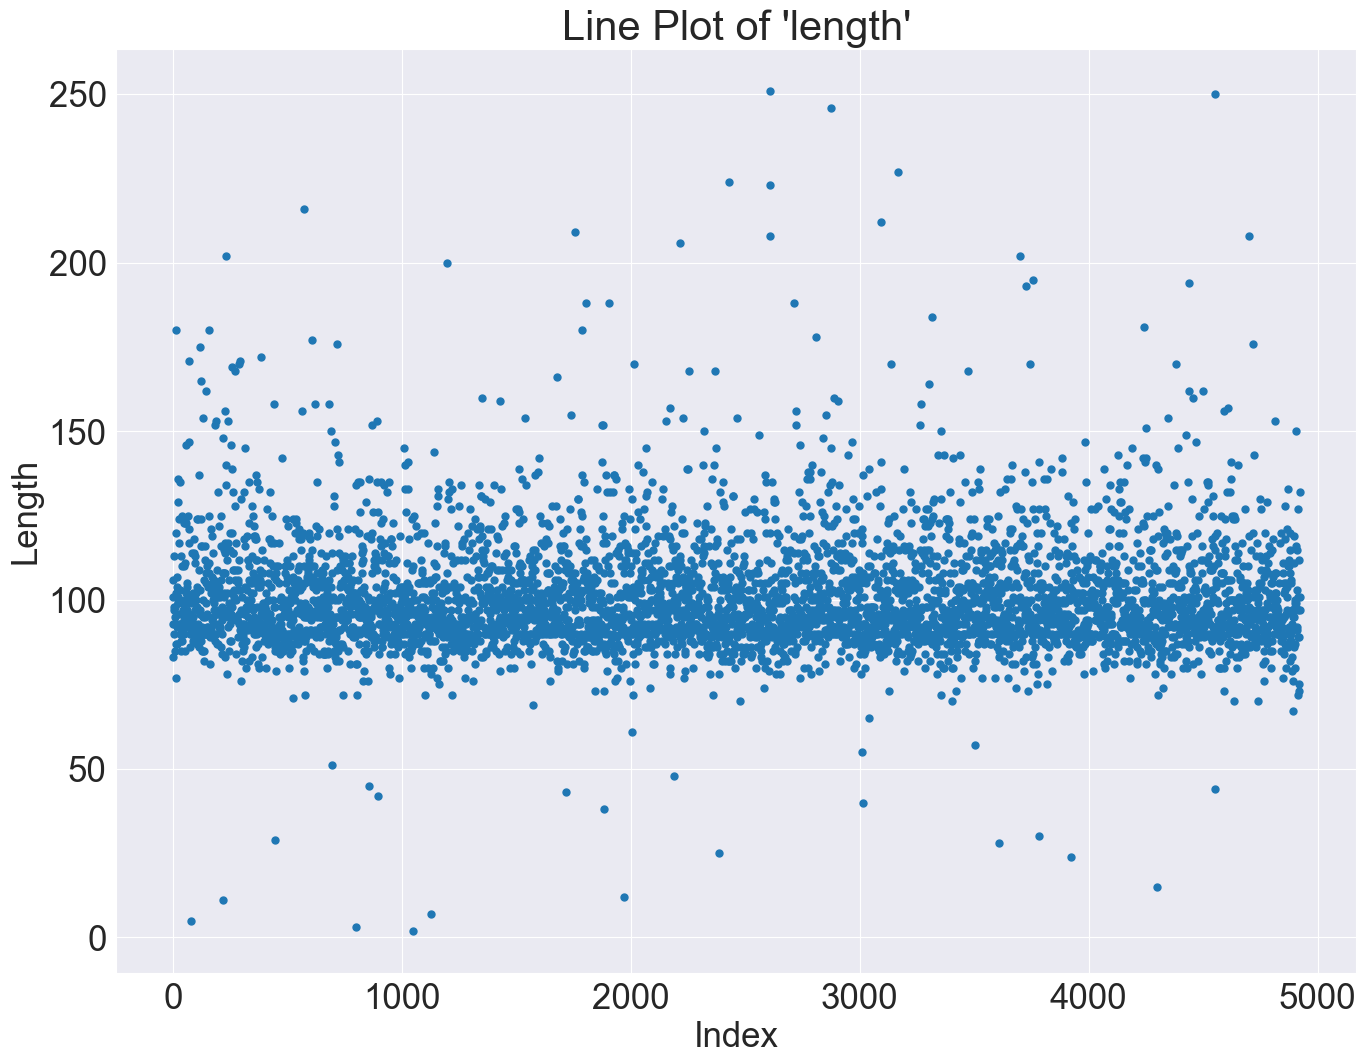

In [8]:
# Plot
plt.scatter(md.index, md['length'], marker='o', s=25)  # Use scatter for points
plt.title("Line Plot of 'length'")
plt.xlabel("Index")
plt.ylabel("Length")
plt.show()

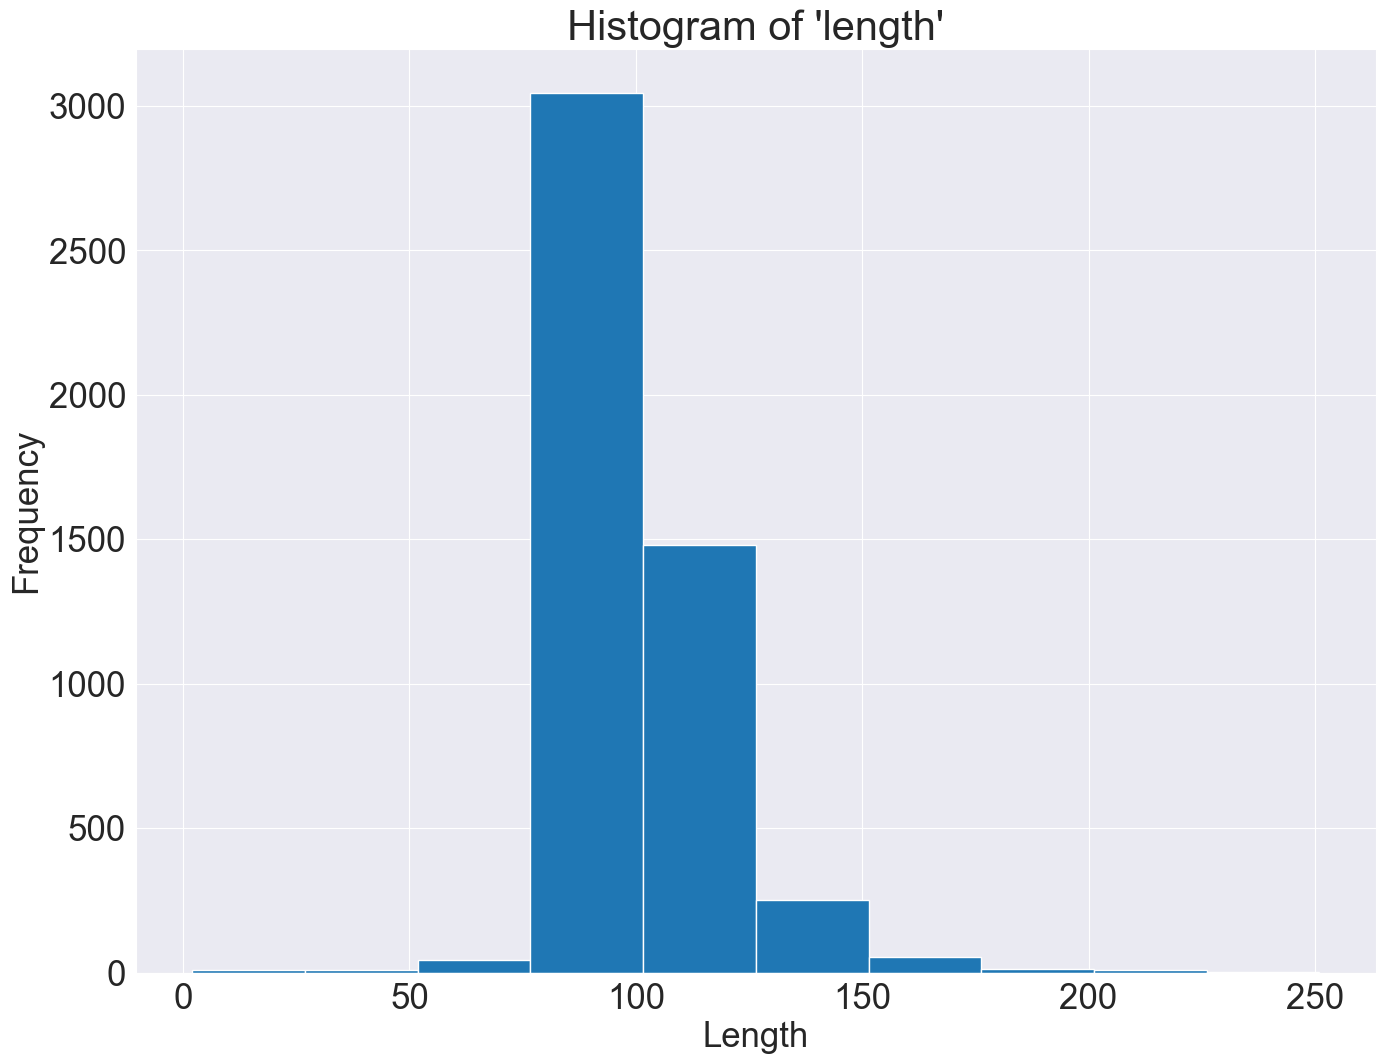

In [9]:
# Histogram
plt.hist(md['length'], bins=10)
plt.title("Histogram of 'length'")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

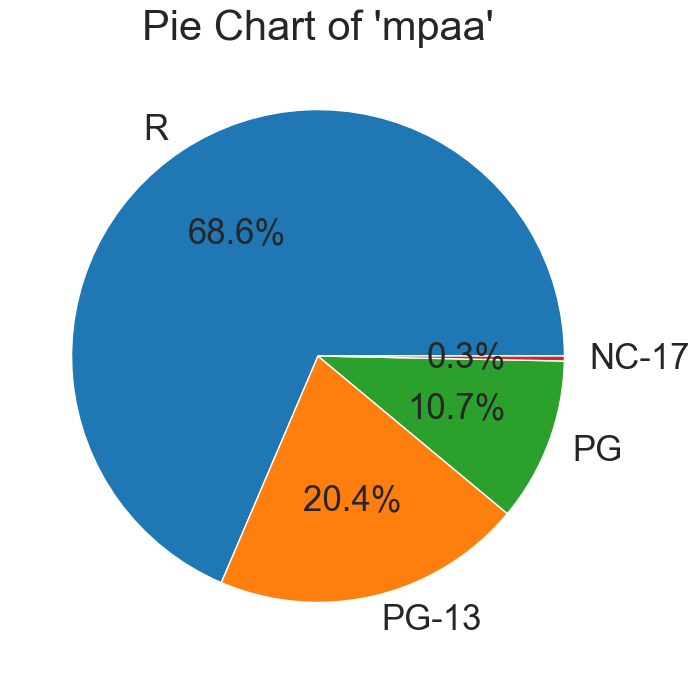

In [10]:
# Pie Chart
plt.figure(figsize=(8, 8))
md['mpaa'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Pie Chart of 'mpaa'")
plt.ylabel("")
plt.show()

### Seaborn

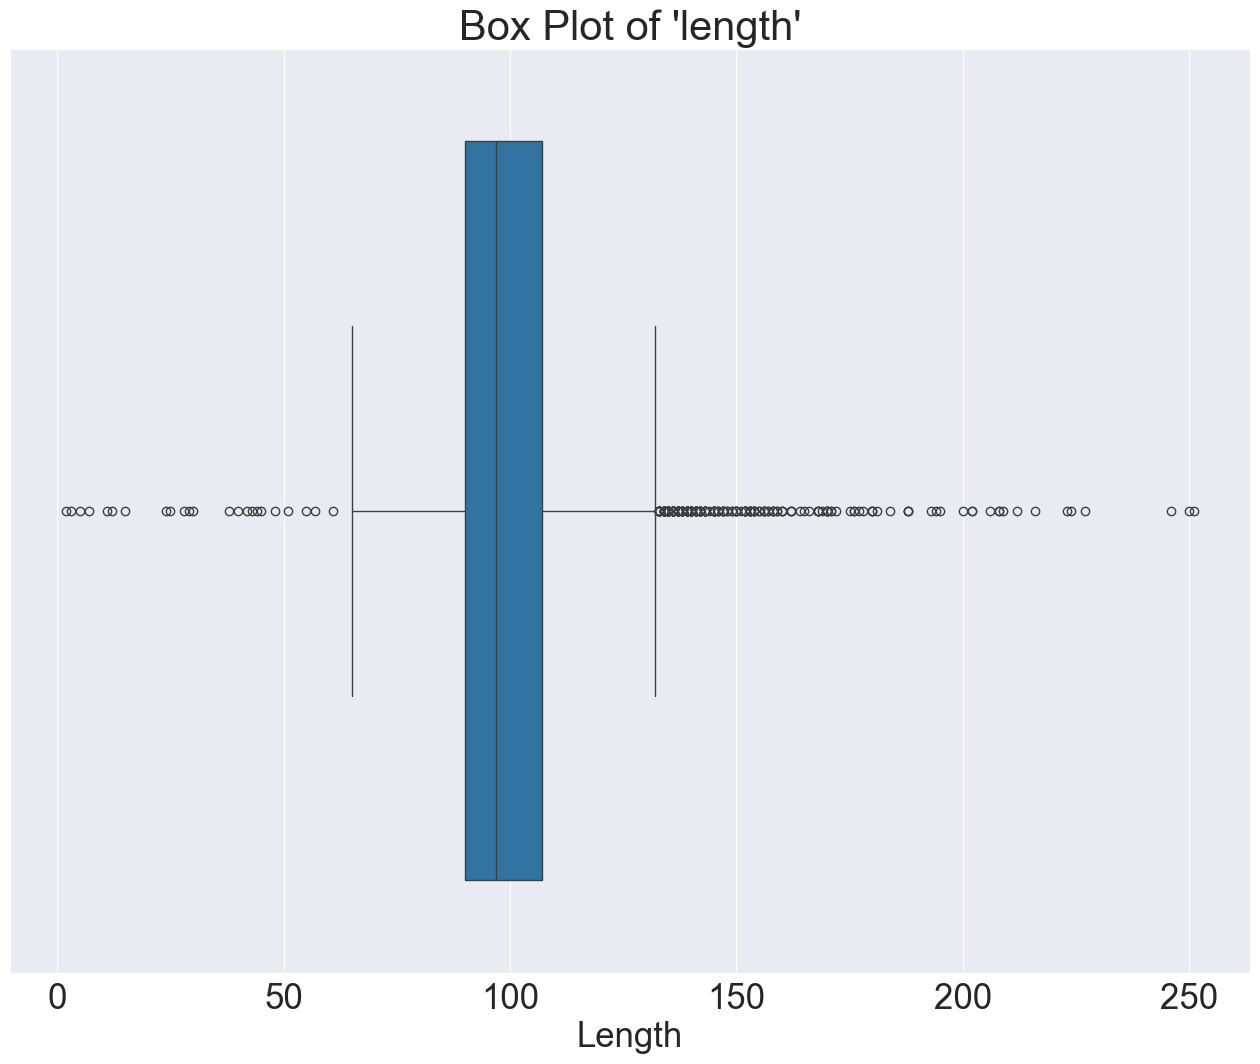

In [11]:
# Box Plot
sns.boxplot(md['length'], orient='h')
plt.title("Box Plot of 'length'")
plt.xlabel("Length")
plt.show()

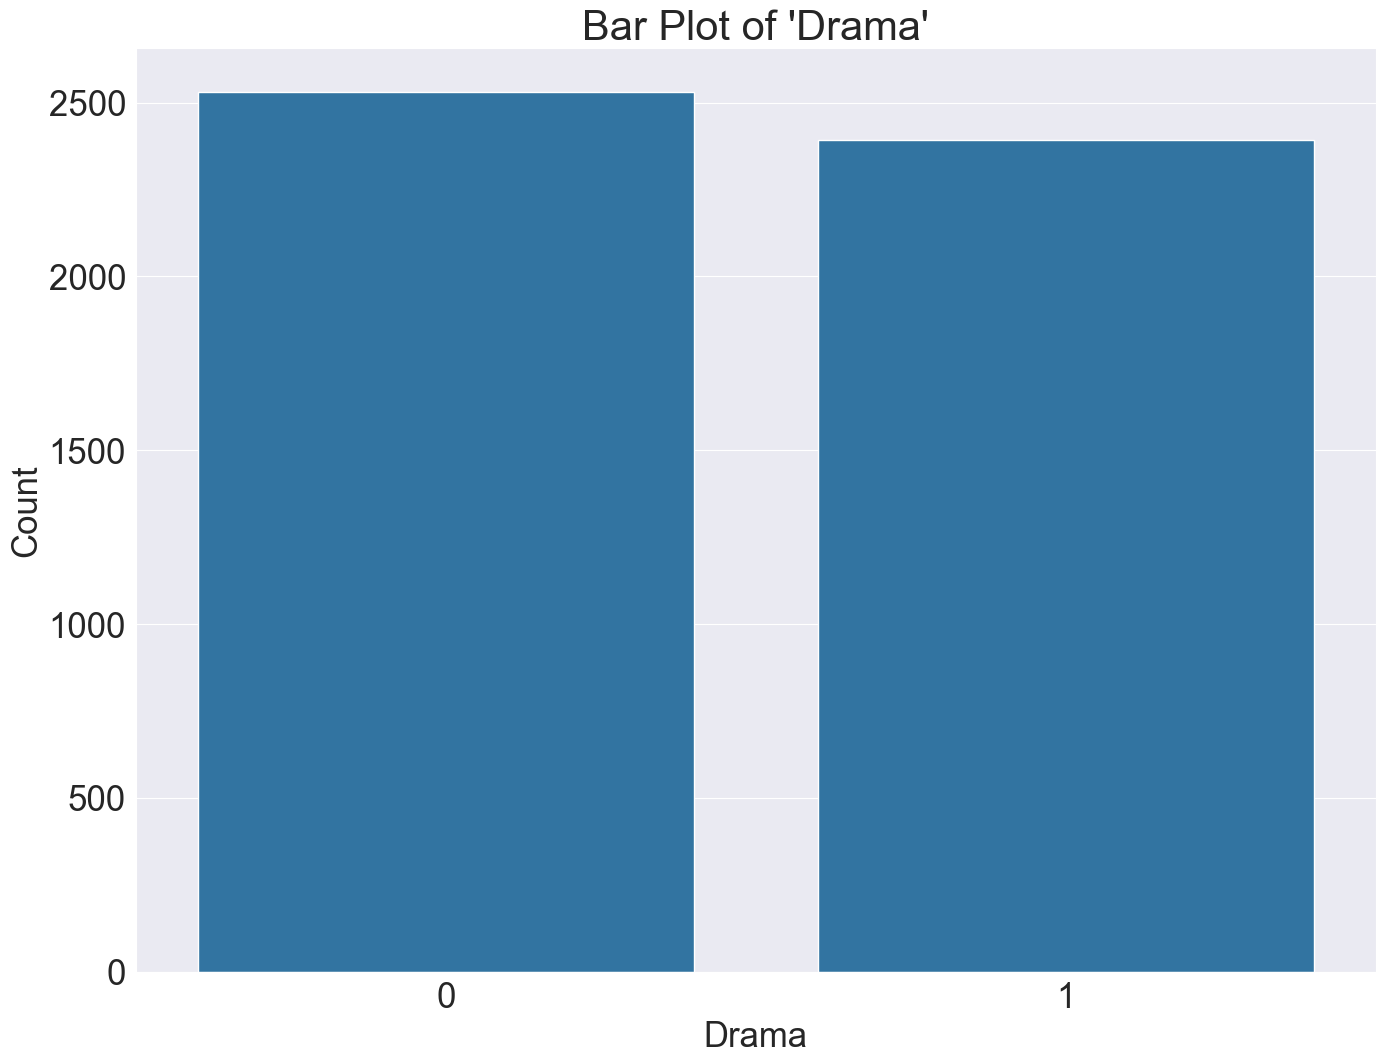

In [12]:
# Bar Plot
sns.countplot(x='Drama', data=md)
plt.title("Bar Plot of 'Drama'")
plt.xlabel("Drama")
plt.ylabel("Count")
plt.show()

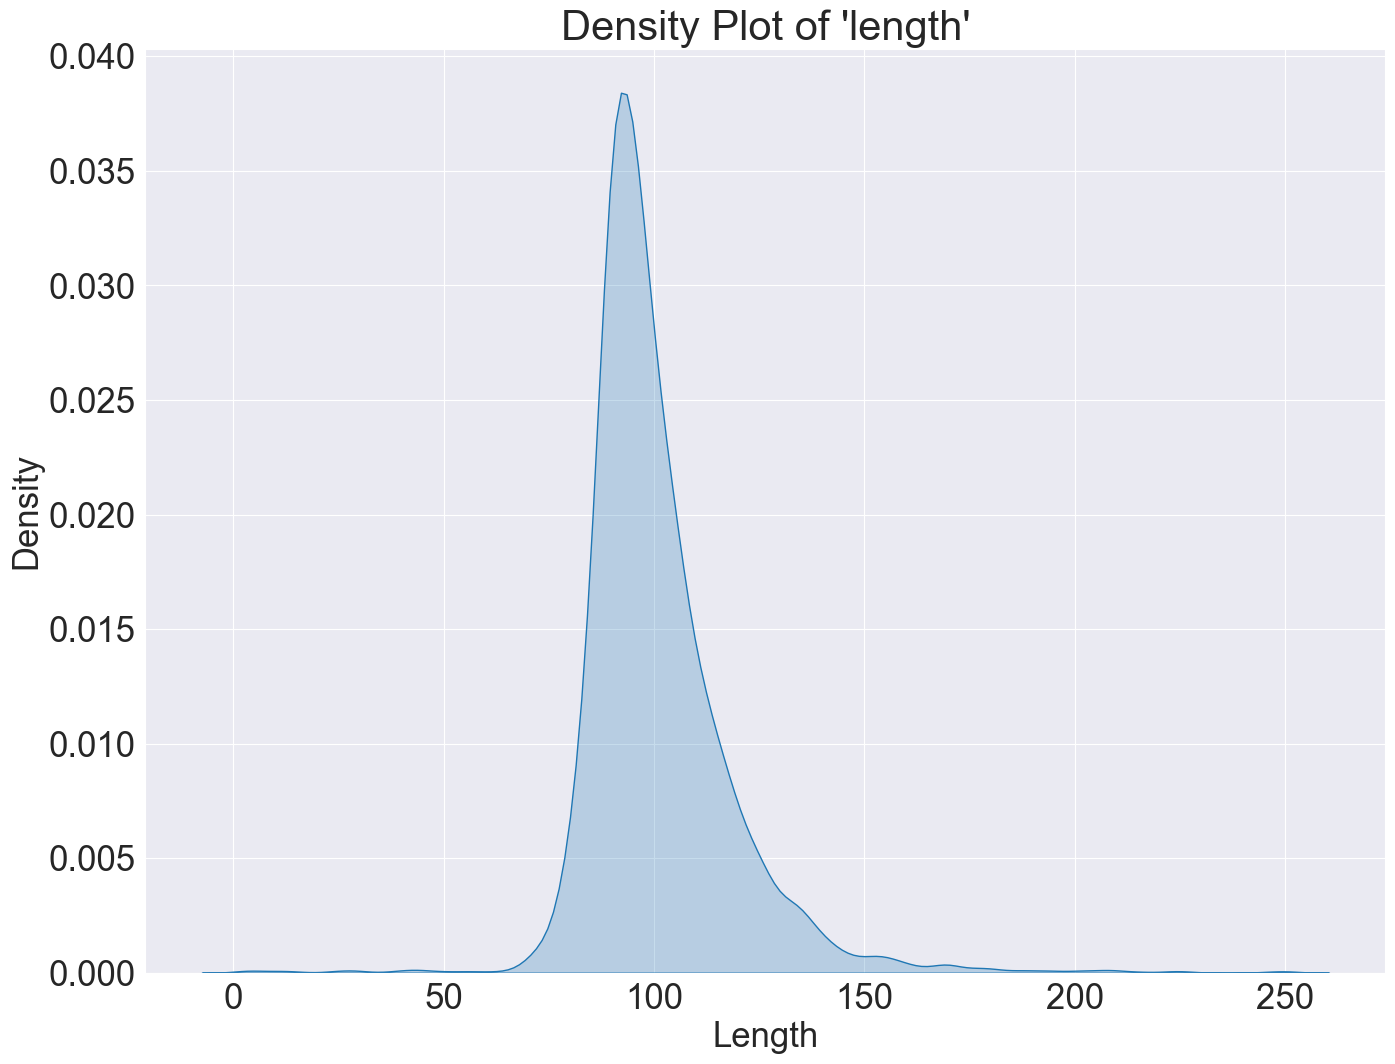

In [13]:
# Density Plot
sns.kdeplot(md['length'], fill=True)
plt.title("Density Plot of 'length'")
plt.xlabel("Length")
plt.ylabel("Density")
plt.show()

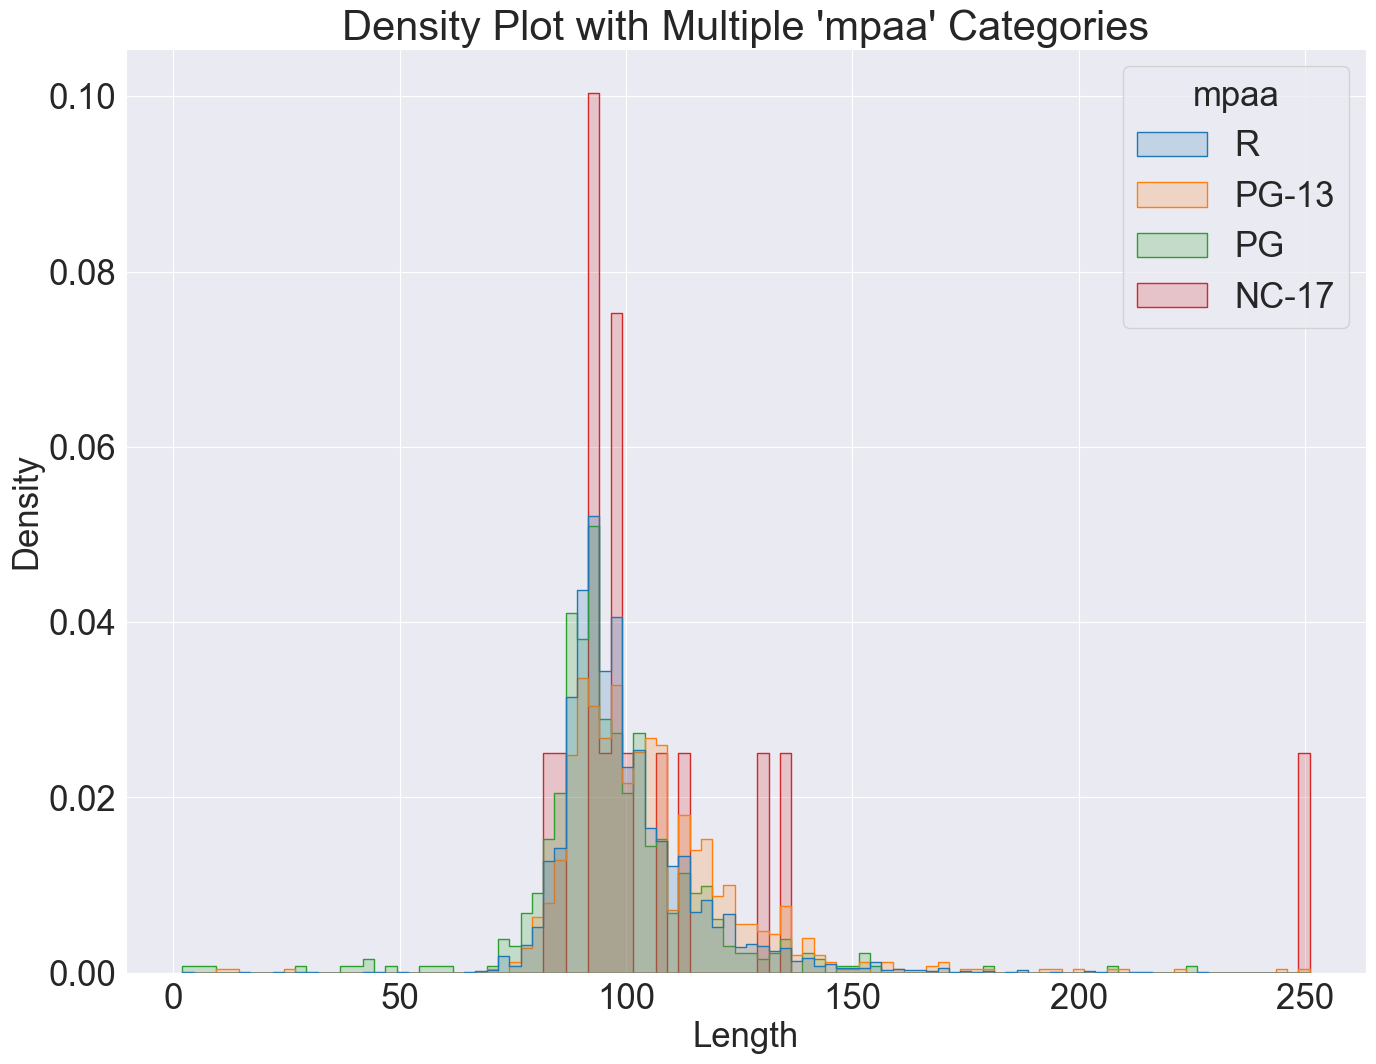

In [14]:
# Multiple Histograms Plot with Seaborn
sns.histplot(md, x='length', hue='mpaa', common_norm=False, element='step', stat='density', fill=True, alpha=0.2, bins=100)
plt.title("Density Plot with Multiple 'mpaa' Categories")
plt.xlabel("Length")
plt.show()

### Boxplot

![image info](Box-Plot-and-Whisker-Plot-1.png)

[Image source](https://byjus.com/maths/box-plot/)

Minimum: The minimum value in the given dataset

First Quartile (Q1): The first quartile is the median of the lower half of the data set.

Median: The median is the middle value of the dataset, which divides the given dataset into two equal parts. The median is considered as the second quartile.

Third Quartile (Q3): The third quartile is the median of the upper half of the data.

Maximum: The maximum value in the given dataset.

Apart from these five terms, the other terms used in the box plot are:

Interquartile Range (IQR): The difference between the third quartile and first quartile is known as the interquartile range. (i.e.) IQR = Q3-Q1

Outlier: The data that falls on the far left or right side of the ordered data is tested to be the outliers. Generally, the outliers fall more than the specified distance from the first and third quartile.

(i.e.) Outliers are greater than Q3+(1.5 . IQR) or less than Q1-(1.5 . IQR).

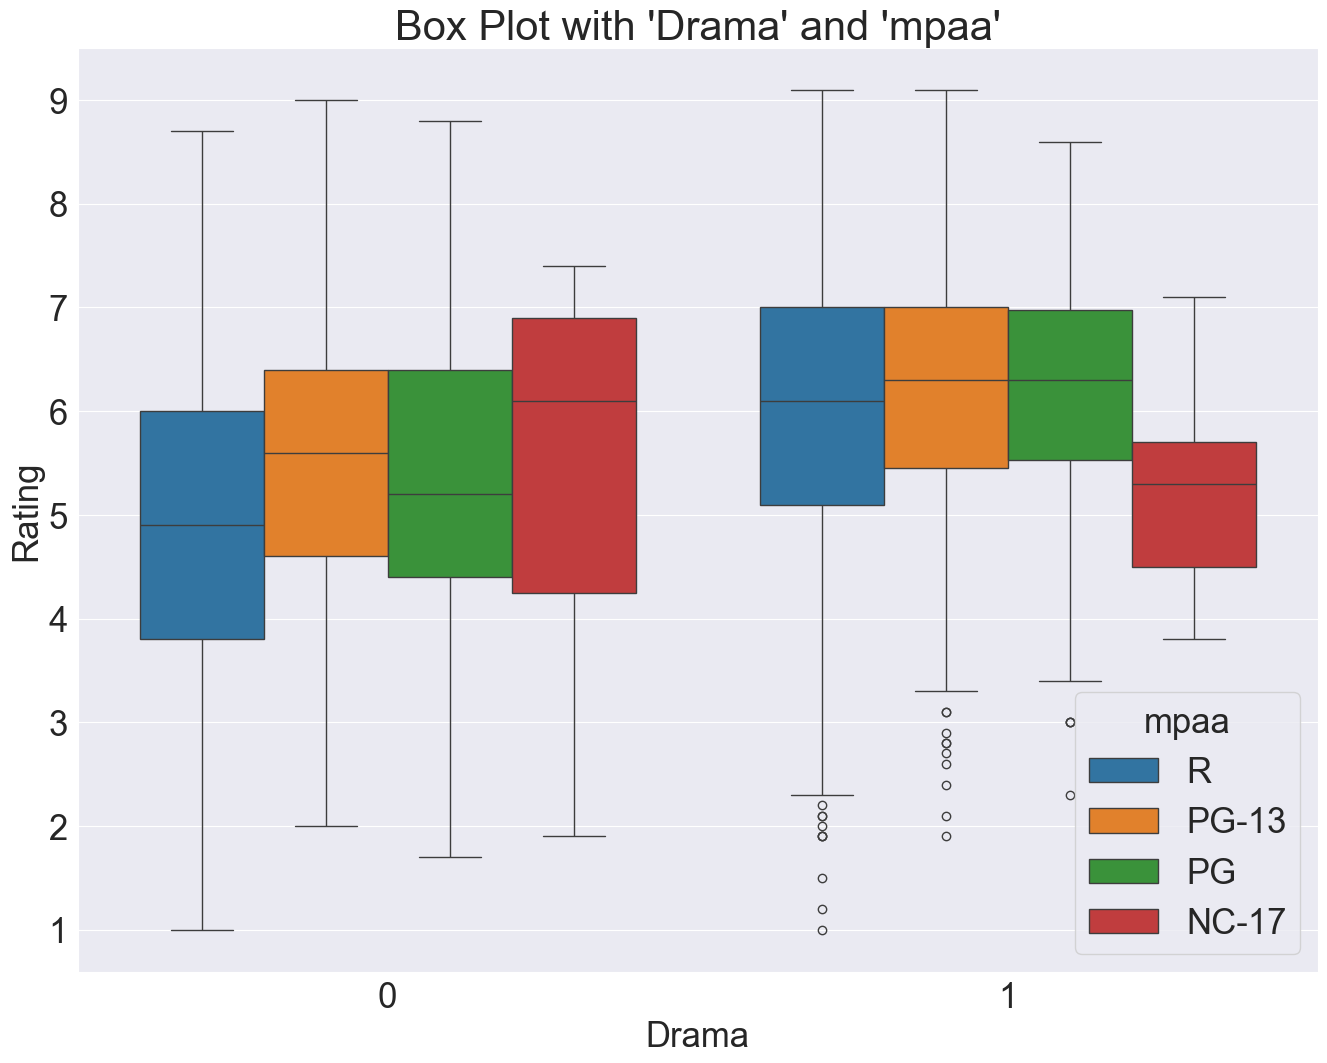

In [15]:
# Box Plot with Seaborn
sns.boxplot(data=md, x='Drama', y='rating', hue='mpaa')
plt.title("Box Plot with 'Drama' and 'mpaa'")
plt.xlabel("Drama")
plt.ylabel("Rating")
plt.show()

# EXAMPLE 1
What is the proportion of comedies to other genres in our data set?

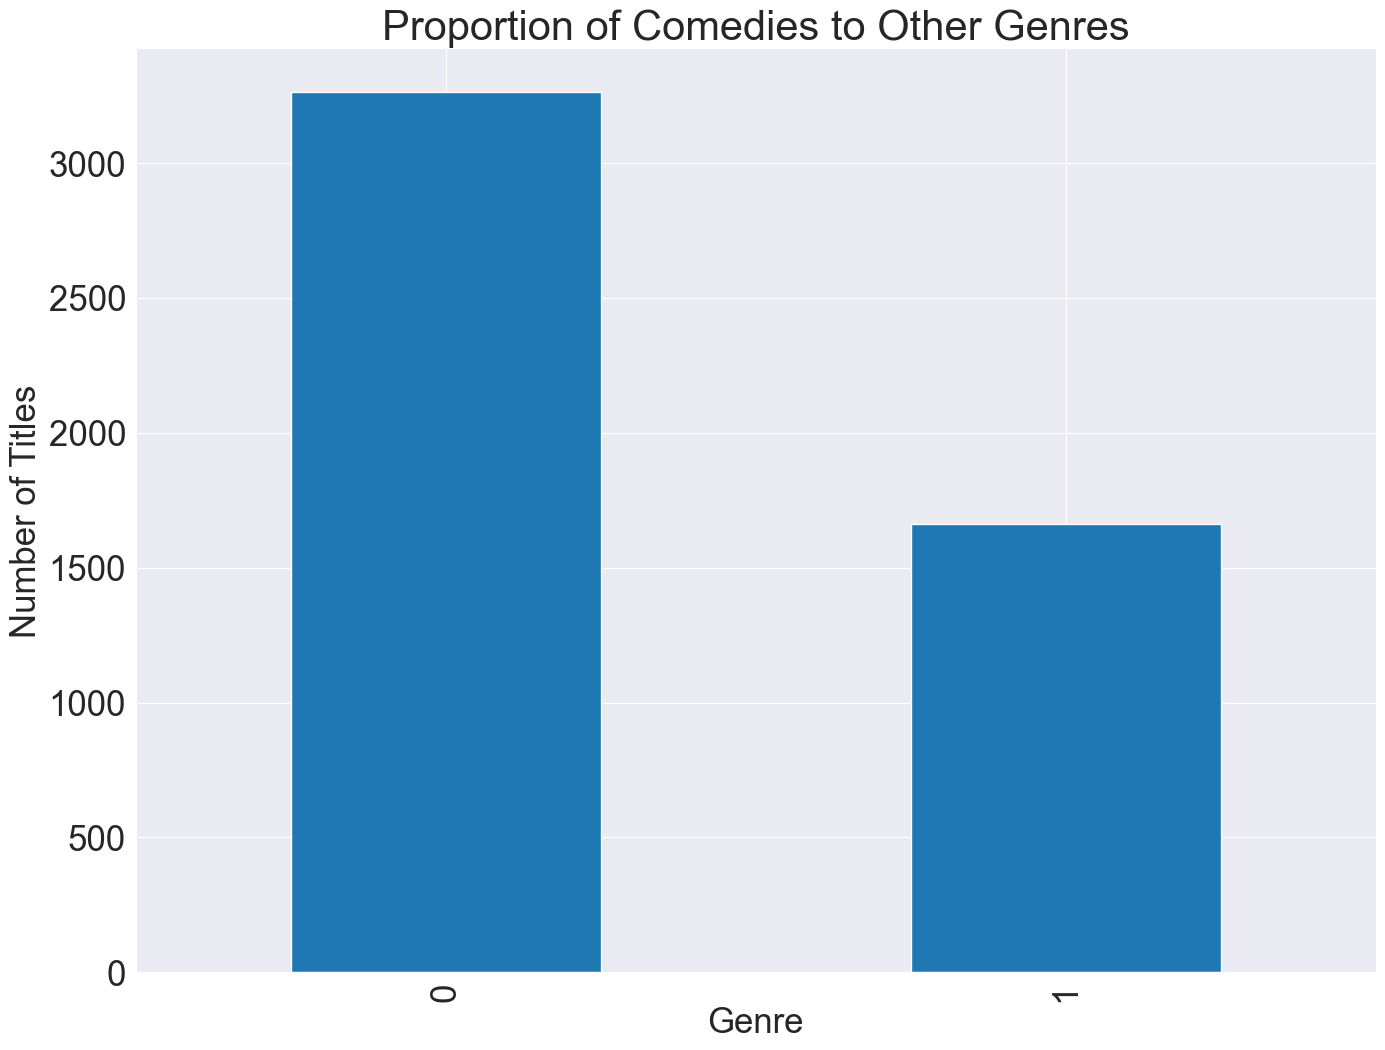

In [16]:
 # The value_counts() method gives the frequency of values in the Series
comedy_counts = md['Comedy'].value_counts()

# The proportion of comedies can be plotted
comedy_counts.plot(kind='bar')
plt.title("Proportion of Comedies to Other Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.show()

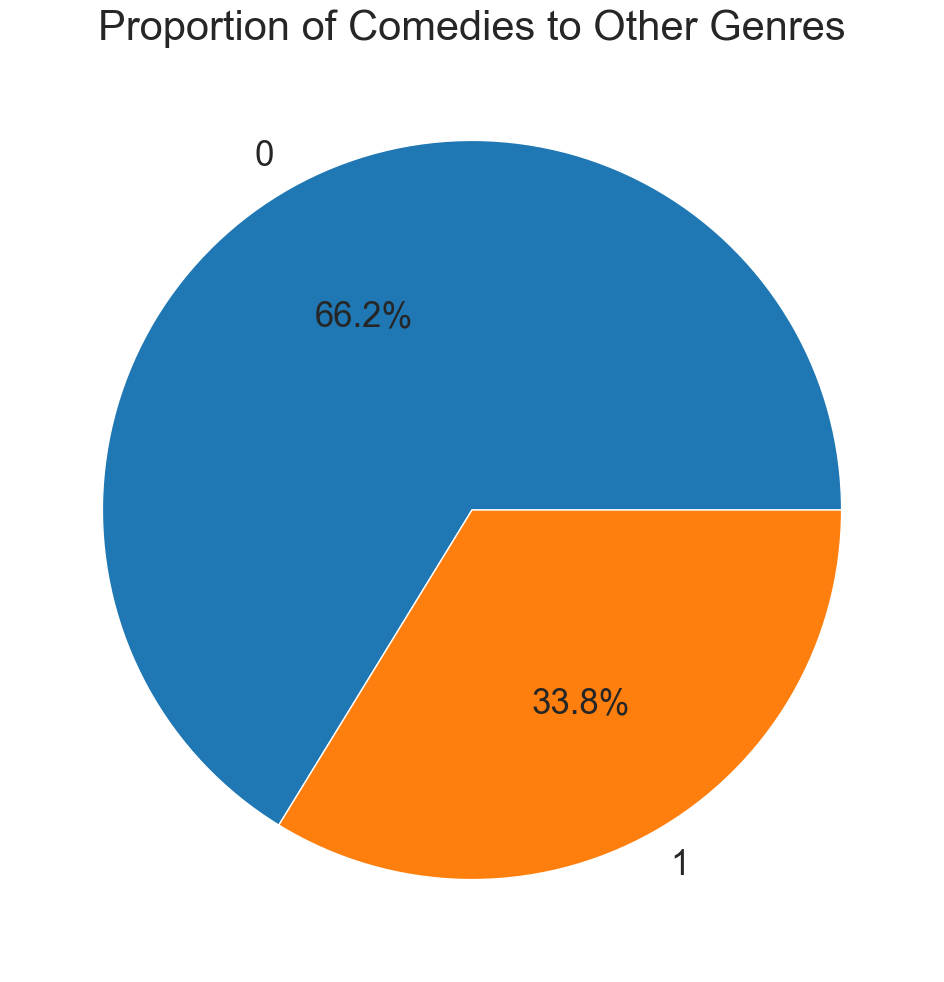

In [17]:
# Pie plot
plt.pie(comedy_counts, labels=comedy_counts.index, autopct='%1.1f%%')
plt.title("Proportion of Comedies to Other Genres")
plt.show()

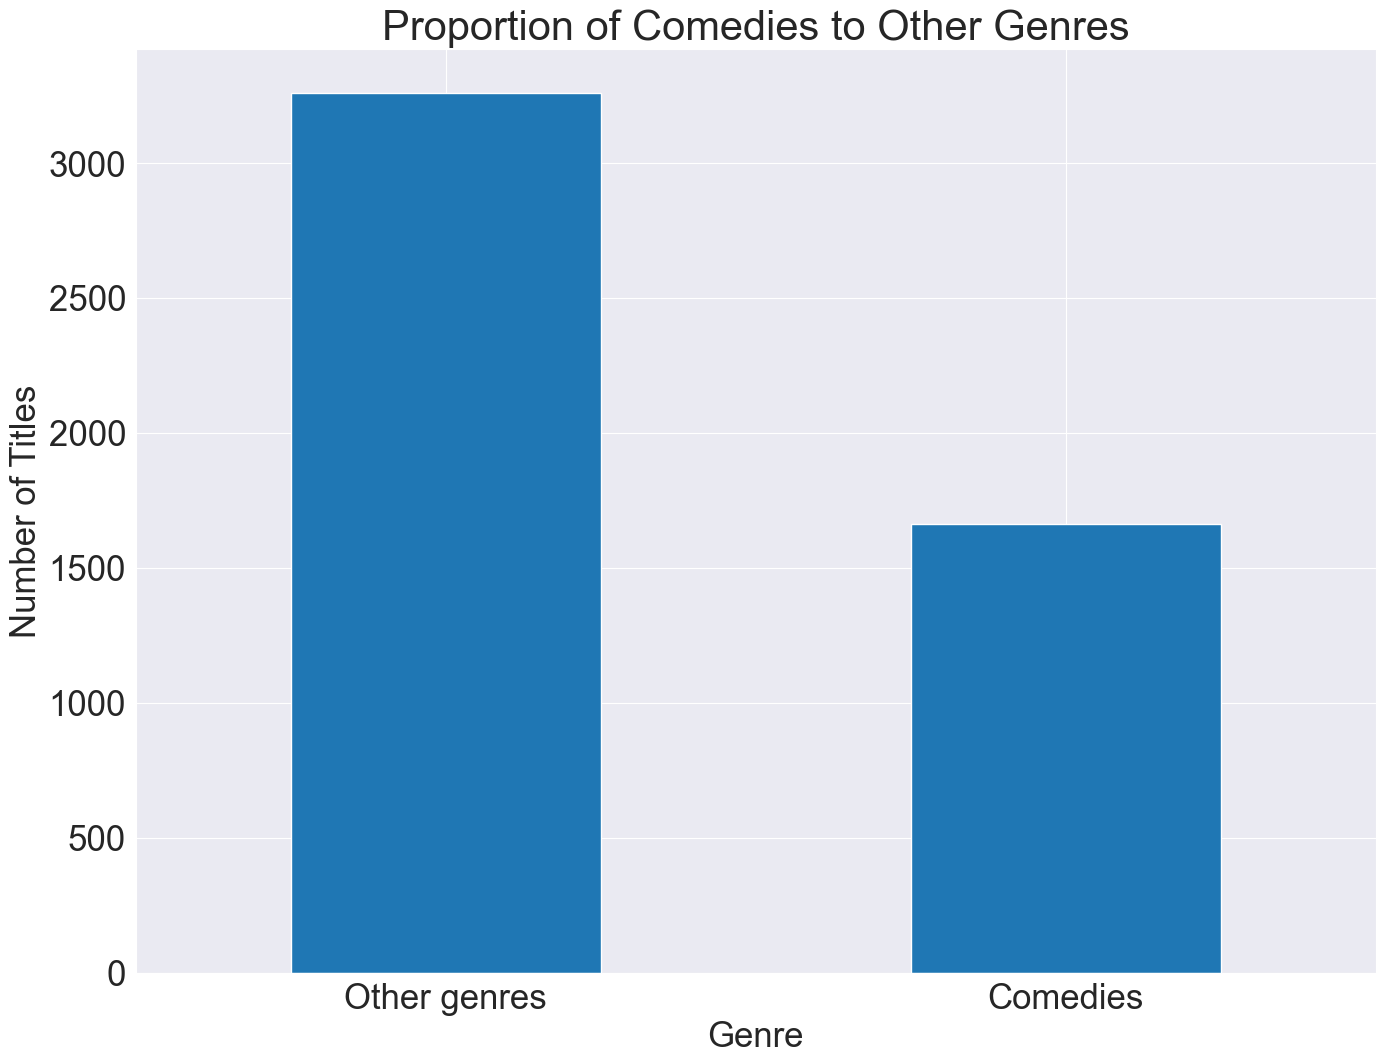

In [18]:
# It is important to always label graphs ...

# Rename the index for better labeling
comedy_counts.index = ["Other genres", "Comedies"]

# Sum of the frequencies
total_titles = sum(comedy_counts)

# Barplot with labels

comedy_counts.plot(kind='bar')
plt.title("Proportion of Comedies to Other Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.xticks(rotation=0)
plt.show()

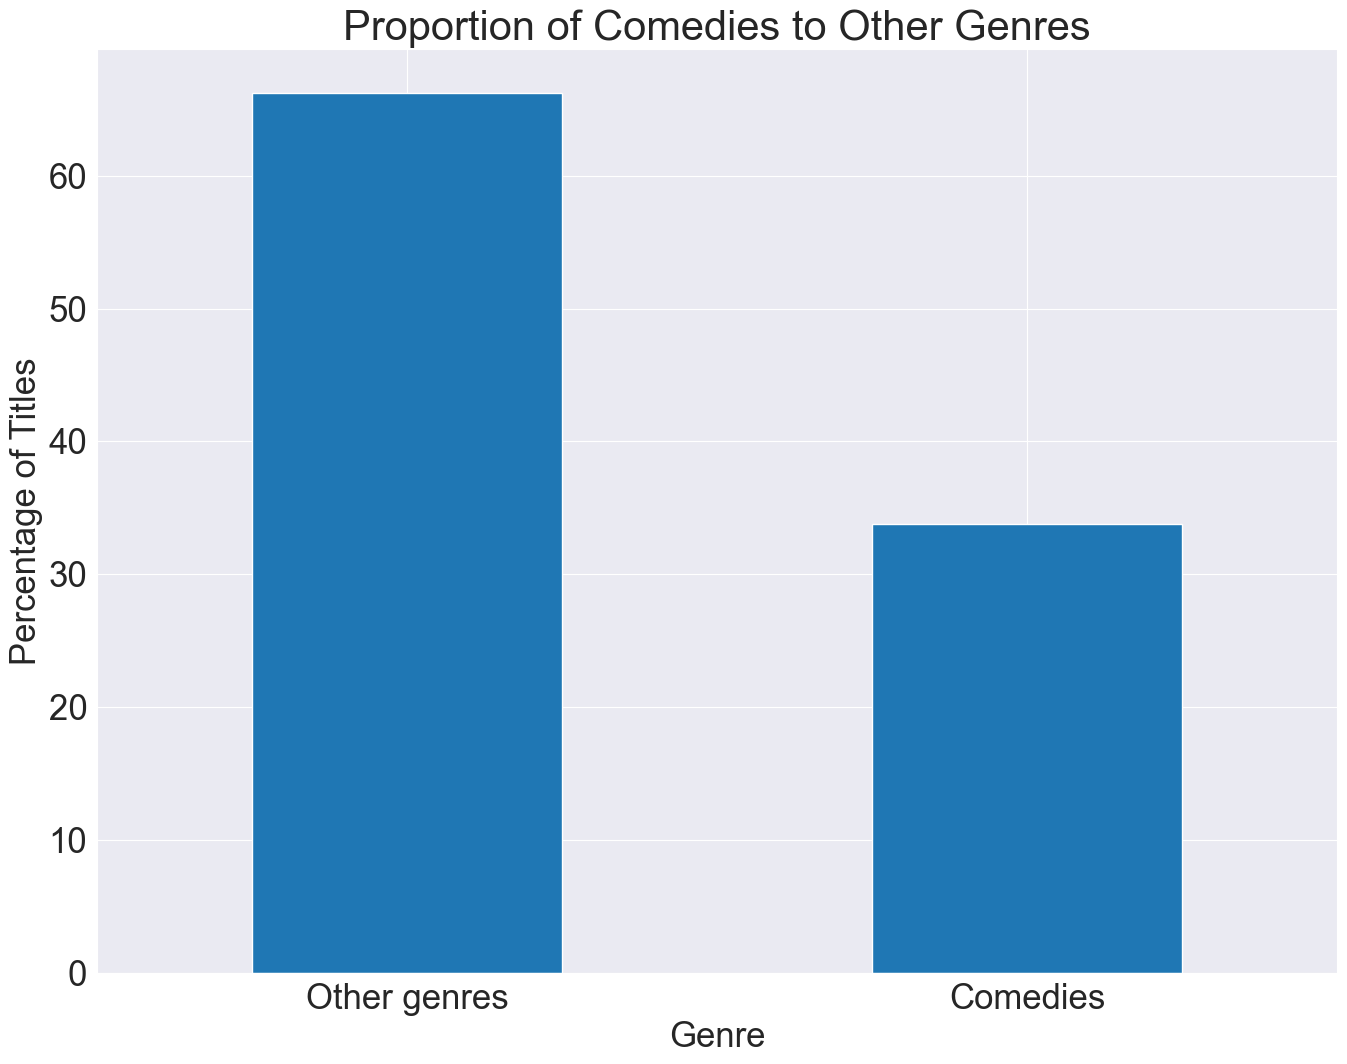

In [19]:
# Barplot with percentages
(comedy_counts / total_titles * 100).plot(kind='bar')
plt.title("Proportion of Comedies to Other Genres")
plt.xlabel("Genre")
plt.ylabel("Percentage of Titles")
plt.xticks(rotation=0)
plt.show()

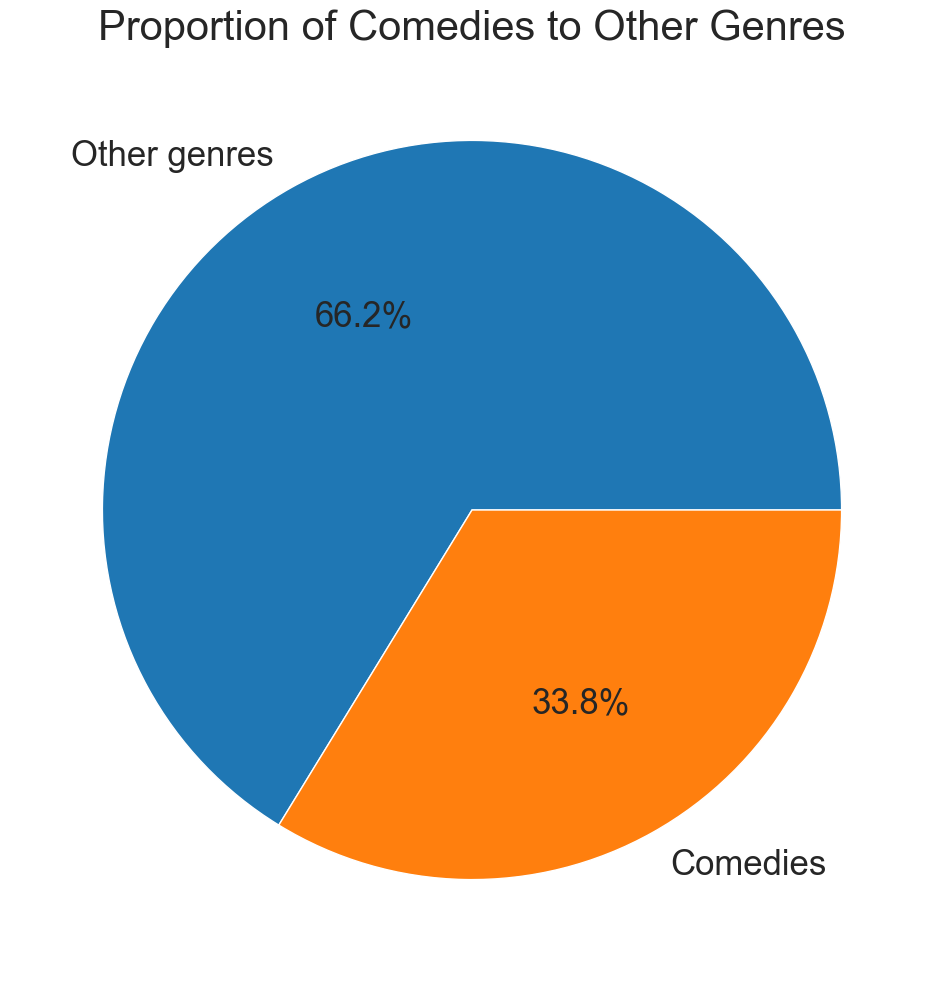

In [20]:
# Pie chart
plt.pie(comedy_counts, labels=comedy_counts.index, autopct='%1.1f%%')
plt.title("Proportion of Comedies to Other Genres")
plt.show()

# EXAMPLE 2
How are ratings distributed for comedies?

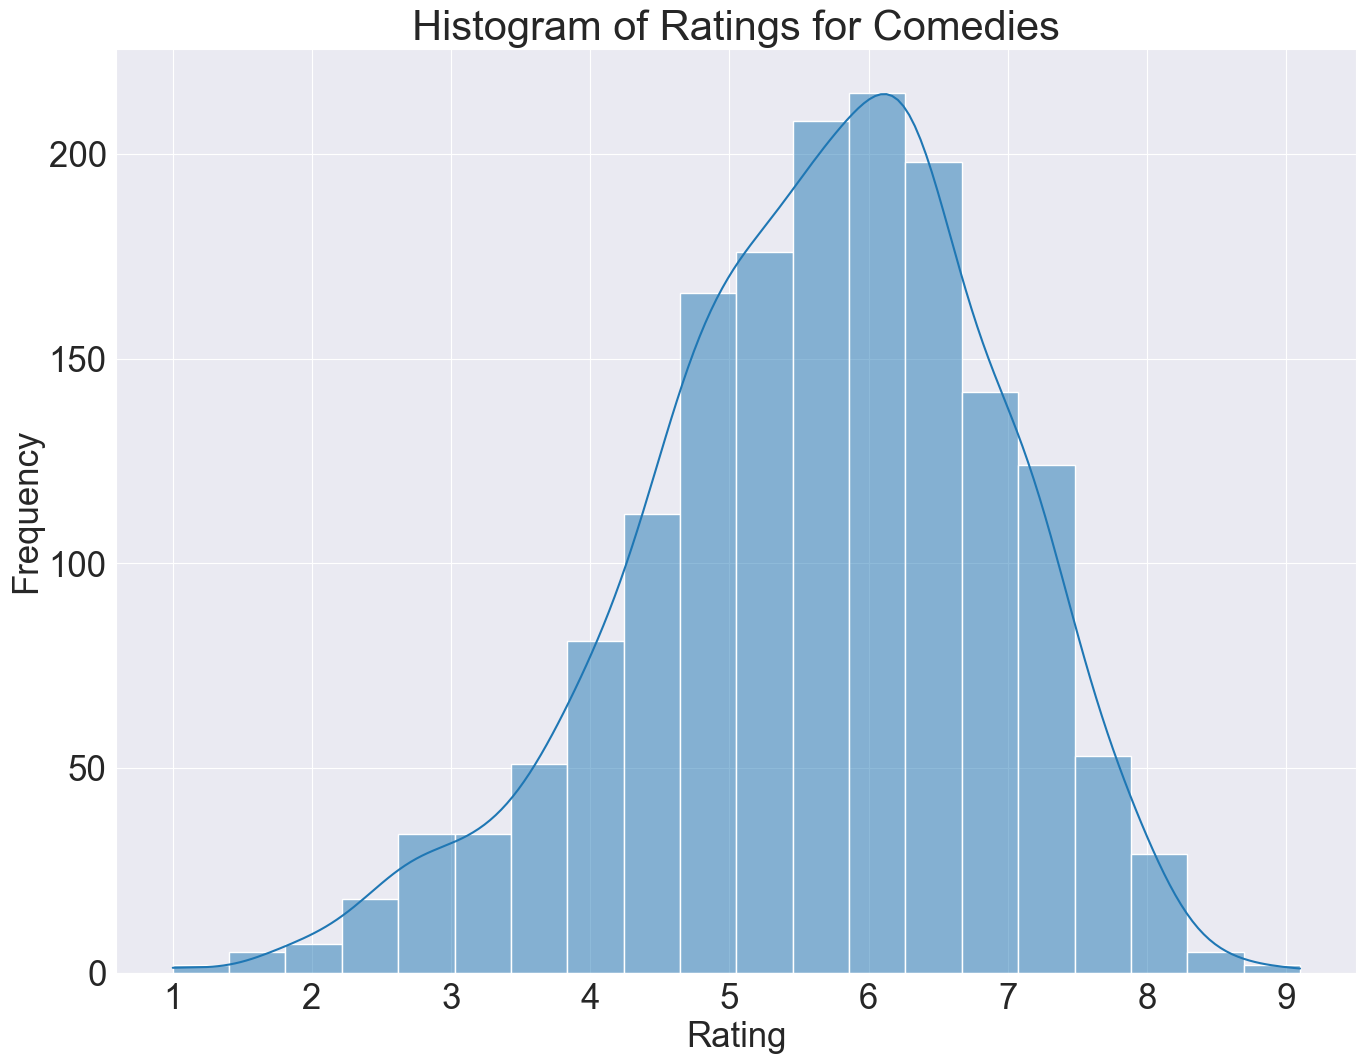

In [21]:
# Plot the rating distribution for comedies with a histogram
sns.histplot(md[md['Comedy'] == 1]['rating'], bins=20, kde=True)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Histogram of Ratings for Comedies")
plt.show()

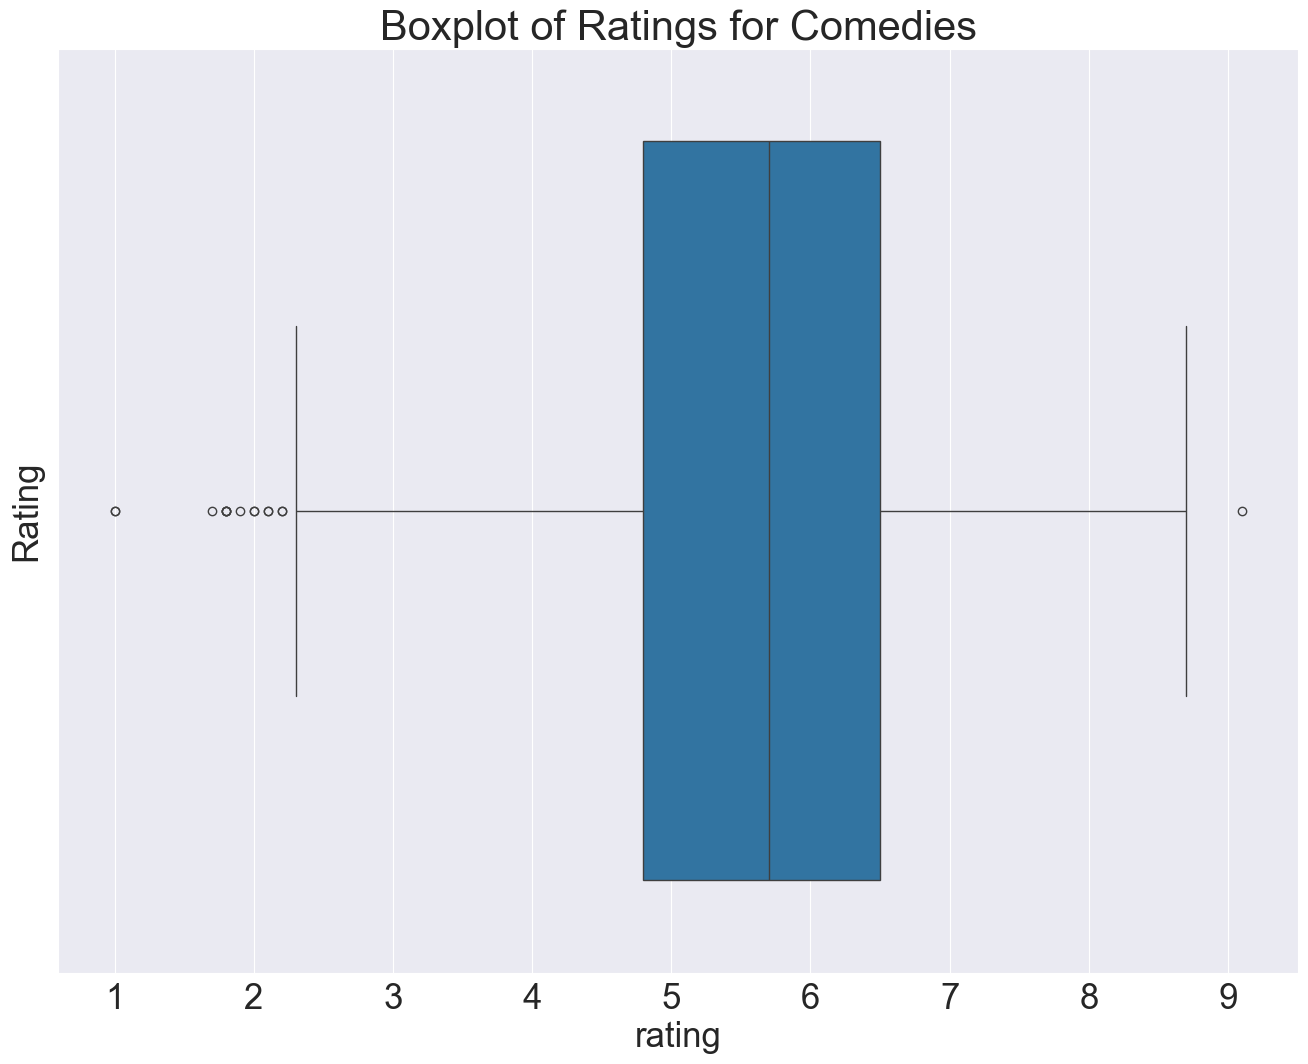

In [22]:
# Box plots provide a visual display of the range and potential skewness of the data
sns.boxplot(x=md[md['Comedy'] == 1]['rating'])
plt.ylabel("Rating")
plt.title("Boxplot of Ratings for Comedies")
plt.show()

In [23]:
# Calculate quantiles for ratings of comedies
quantiles = md[md['Comedy'] == 1]['rating'].quantile([0.25, 0.5, 0.75])
print("Quantiles for Ratings of Comedies:")
print(quantiles)

Quantiles for Ratings of Comedies:
0.25   4.80
0.50   5.70
0.75   6.50
Name: rating, dtype: float64


# EXAMPLE 3
Are comedies on average better rated than non-comedies?

In [24]:
# Selection mask for comedies
comedy = md['Comedy'] == 1

# Calculate the mean rating value for comedies and non-comedies
mean_rating_comedies = md[comedy]['rating'].mean()
mean_rating_non_comedies = md[~comedy]['rating'].mean()

# Display the mean ratings
print("Mean Rating for Comedies:", mean_rating_comedies)
print("Mean Rating for Non-Comedies:", mean_rating_non_comedies)

# Comedies have, on average, higher ratings than non-comedies

Mean Rating for Comedies: 5.623104693140796
Mean Rating for Non-Comedies: 5.468362967504599


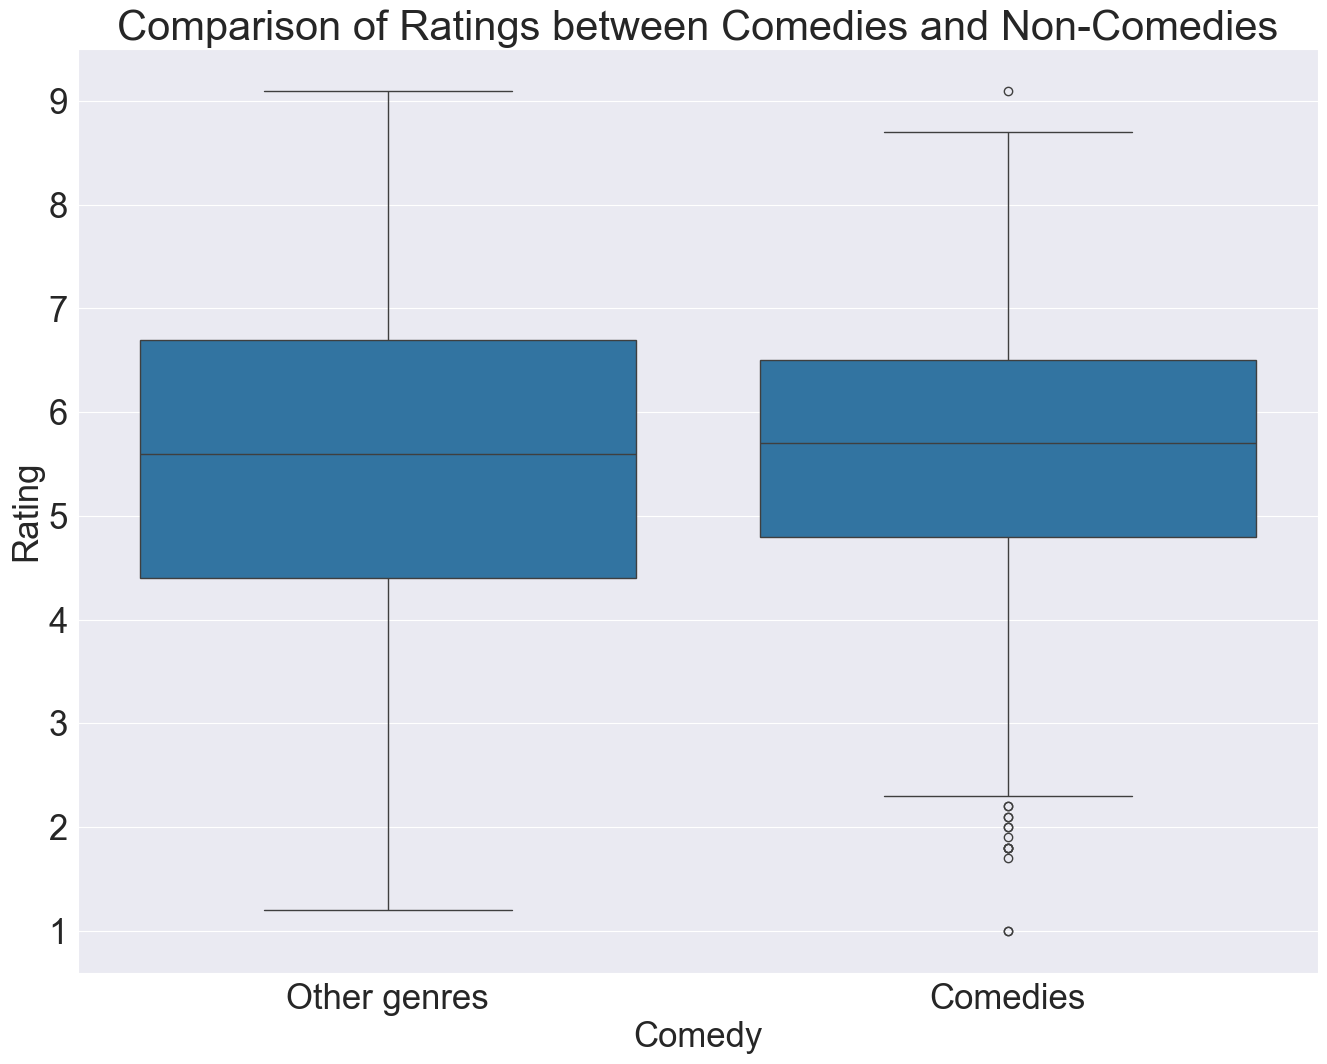

In [25]:
# Side-by-side boxplots of ratings grouped by values of the attribute "Comedy"
sns.boxplot(x='Comedy', y='rating', data=md)
plt.xticks([0, 1], ["Other genres", "Comedies"])
plt.ylabel("Rating")
plt.title("Comparison of Ratings between Comedies and Non-Comedies")
plt.show()

In [26]:
# or with Pandas and groupby
median_ratings = md.groupby('Comedy')['rating'].median()
print("Median Ratings for Comedies and Non-Comedies:")
print(median_ratings)

Median Ratings for Comedies and Non-Comedies:
Comedy
0   5.60
1   5.70
Name: rating, dtype: float64


/var/folders/tp/v5w20s915jd5hbhs0jcrnrwc0000gn/T/ipykernel_24131/2004716643.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_ratings = md.groupby('Comedy')['rating'].median()


# EXAMPLE 4
What is the proportion of comedies (per year) from 1990 onwards?

In [27]:
# Selection mask for rows where the year is greater than or equal to 1990
sel = md['year'] >= 1990

# Use the pivot_table method to get a two-way contingency table
md['Comedy'] = md['Comedy'].astype(int)
contingency_table = pd.pivot_table(md[sel], values='Comedy', index='year', aggfunc='sum')

# Calculate the total number of movies per year
total_movies_per_year = md[sel]['year'].value_counts().sort_index()

# Calculate the proportion of comedies per year
proportion_comedies = contingency_table.iloc[:, 0] / total_movies_per_year

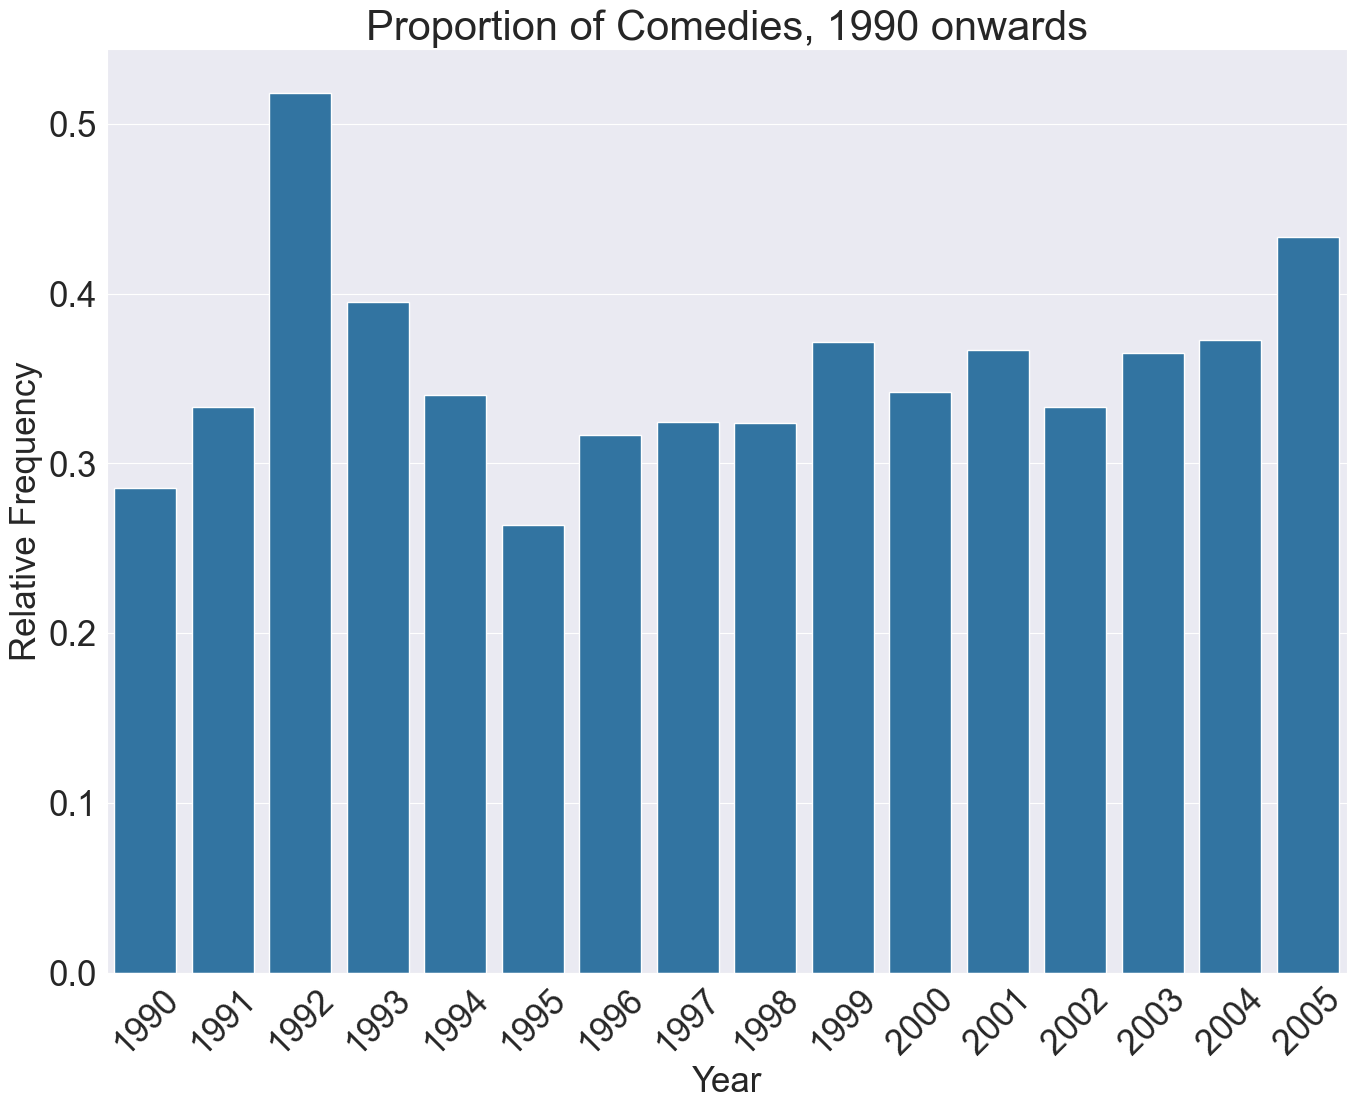

In [28]:
# Plot the proportion of comedies over the years
sns.barplot(x=proportion_comedies.index, y=proportion_comedies.values)
plt.xlabel("Year")
plt.ylabel("Relative Frequency")
plt.title("Proportion of Comedies, 1990 onwards")
plt.xticks(rotation=45)
plt.show()

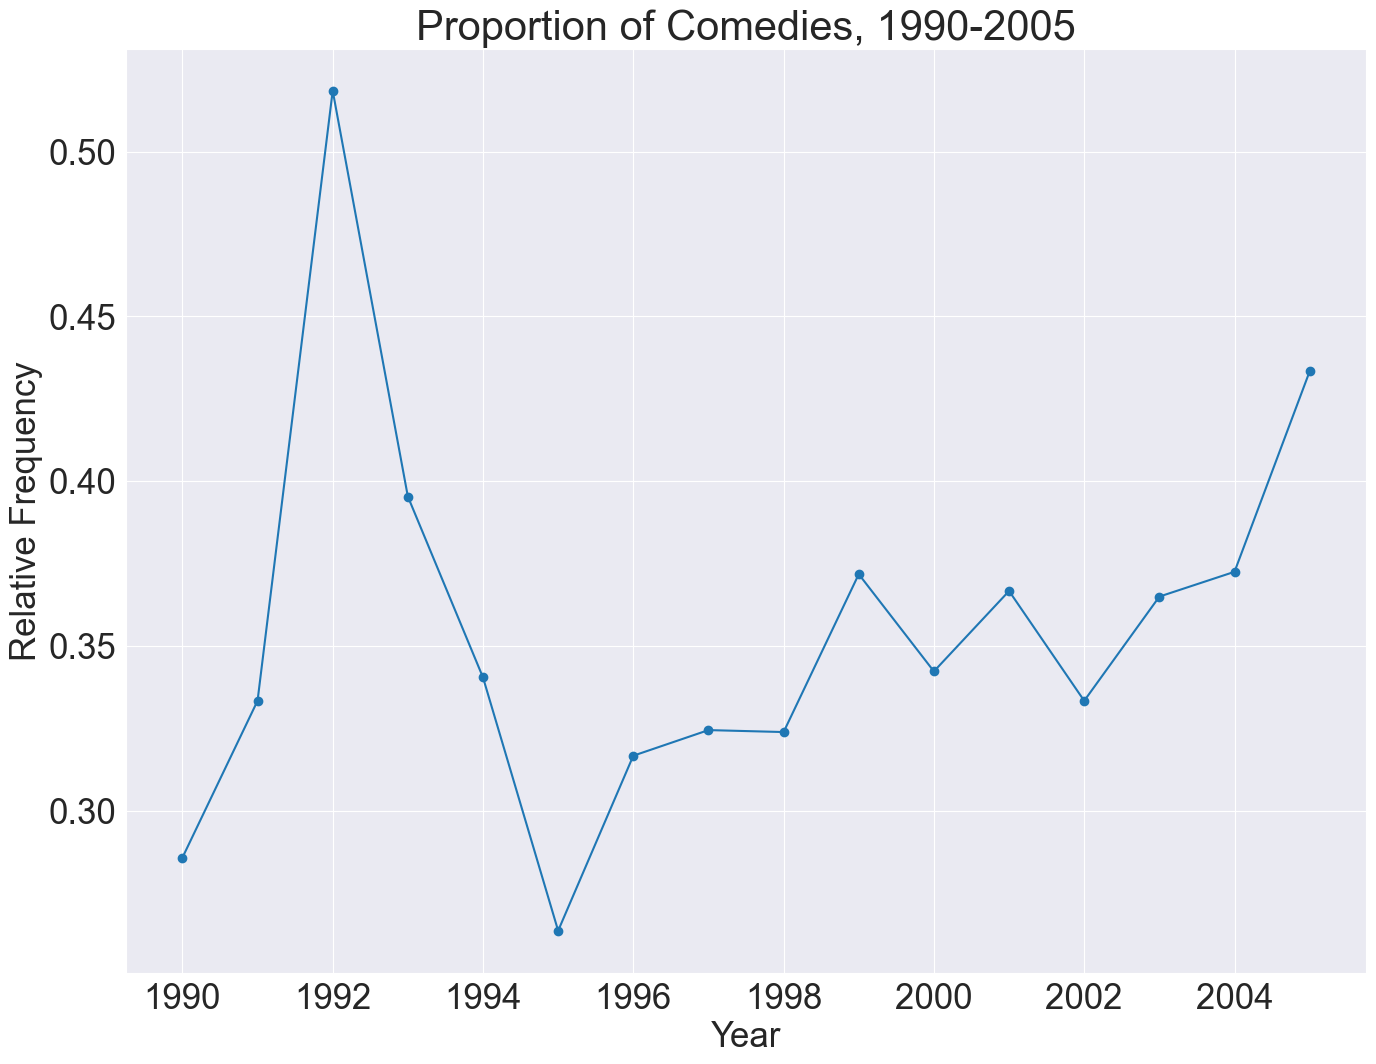

In [29]:
# Line plot for the proportion of comedies from 1990 to 2005
plt.plot(proportion_comedies.index, proportion_comedies.values, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Relative Frequency")
plt.title("Proportion of Comedies, 1990-2005")
plt.grid(True)
plt.show()

# EXAMPLE 5
Are there more movies above or below the average rating?

In [30]:
# Calculate the average rating
average_rating = md['rating'].mean()

# Display the average rating
print("Average Rating:", average_rating)

# Count how many movies are above and below the average rating
above_average = (md['rating'] > average_rating).sum()
below_average = (md['rating'] < average_rating).sum()

# Create a dictionary to store the results
ratings_count = {
    "below": below_average,
    "above": above_average
}

Average Rating: 5.520593013809911


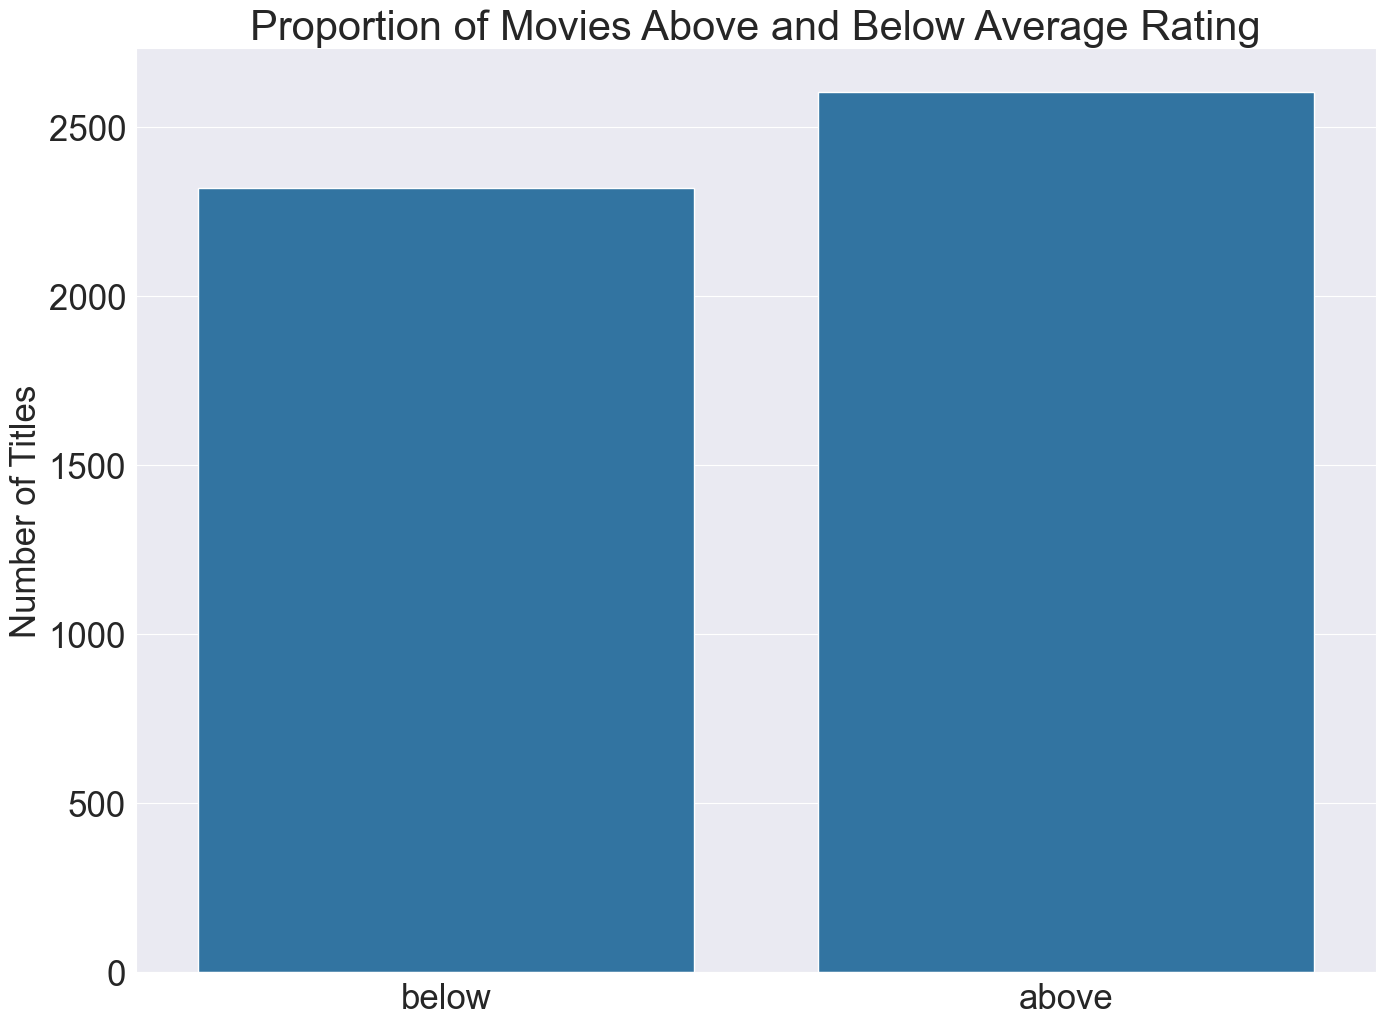

In [31]:
# Bar plot to compare movies above and below average rating
sns.barplot(x=list(ratings_count.keys()), y=list(ratings_count.values()))
plt.ylabel("Number of Titles")
plt.title("Proportion of Movies Above and Below Average Rating")
plt.show()

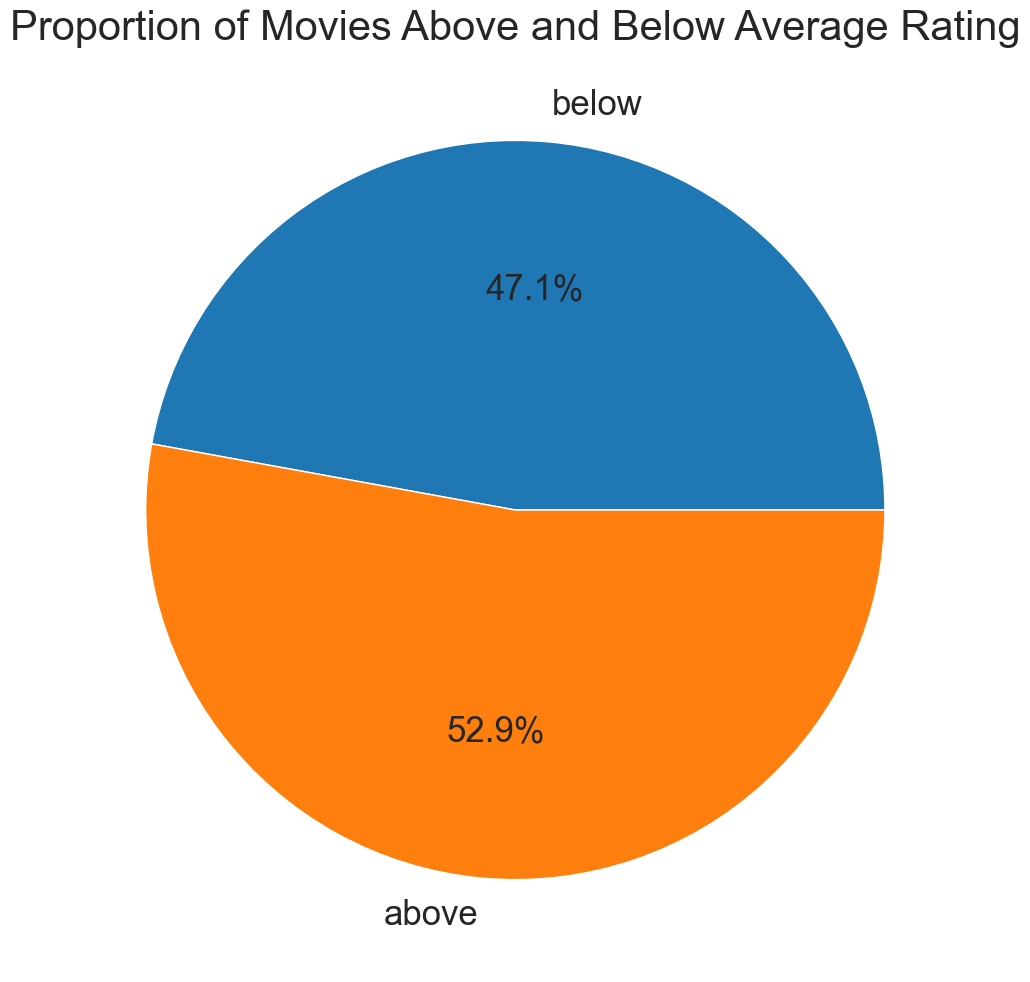

In [32]:
# Pie chart for the same comparison
plt.pie(list(ratings_count.values()), labels=list(ratings_count.keys()), autopct='%1.1f%%')
plt.title("Proportion of Movies Above and Below Average Rating")
plt.show()

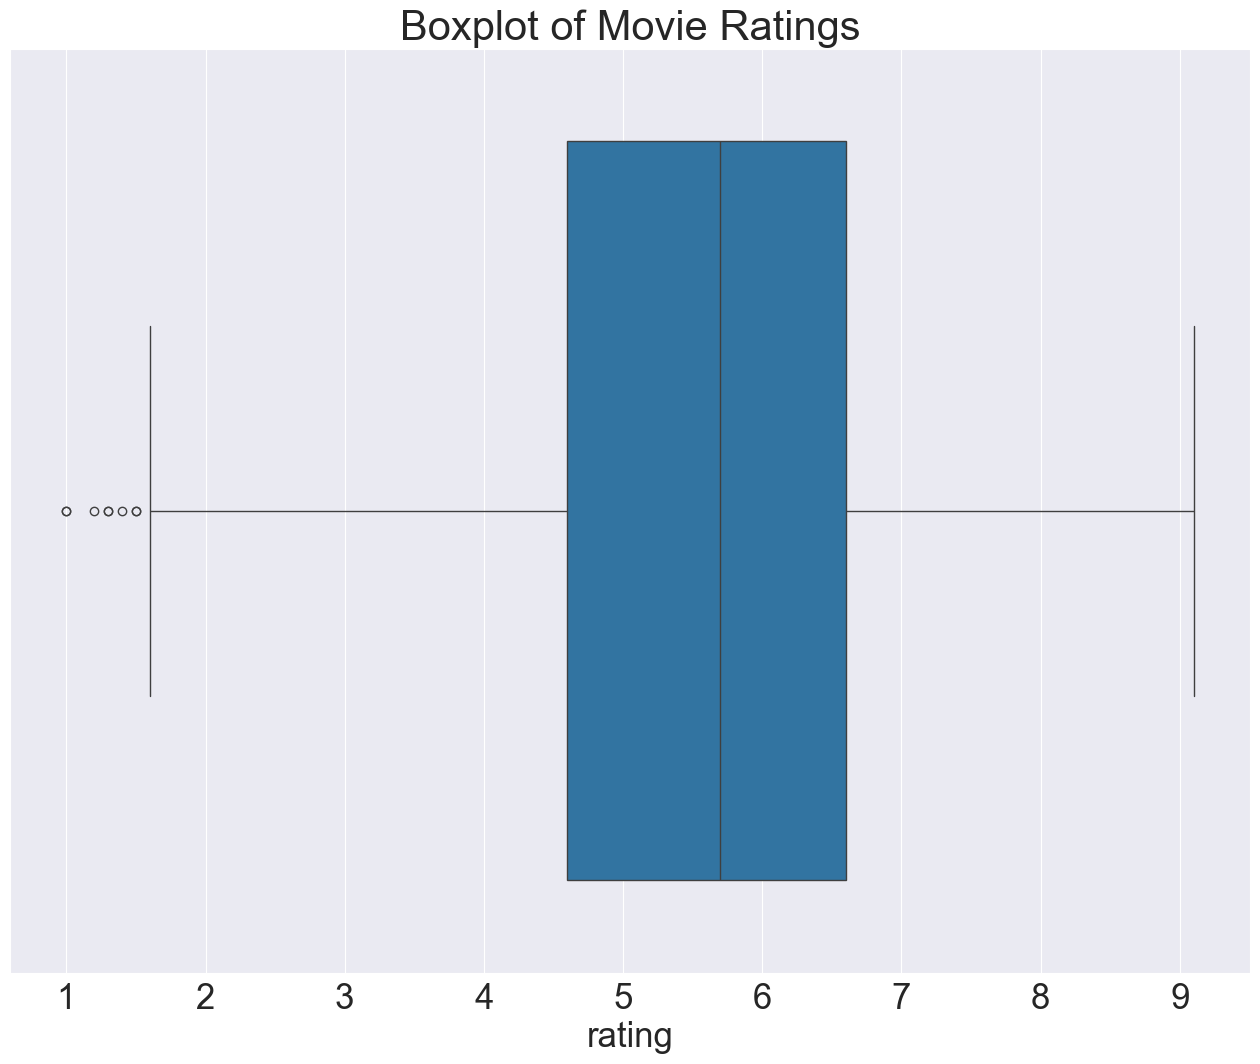

In [33]:
# Boxplot of movie ratings
sns.boxplot(x=md['rating'])
plt.title("Boxplot of Movie Ratings")
plt.show()

# EXAMPLE 6
Do movies with bigger budgets get higher ratings?

In [34]:
# There are missing values in the budget attribute
print("Summary of Budget:")
print(md['budget'].describe())
print('\n')

print("Number of Missing Values in Budget:", md['budget'].isna().sum())
print('\n')

# Select complete observations only
sel = md['budget'].notna()
mdsub = md[sel].copy()

print("Number of Complete Observations:", len(mdsub))
print('\n')

print("Summary of Budget (Complete Observations):")
print(mdsub['budget'].describe())

Summary of Budget:
count        1813.00
mean     28026051.63
std      30783803.93
min          6000.00
25%       5000000.00
50%      16000000.00
75%      40000000.00
max     200000000.00
Name: budget, dtype: float64


Number of Missing Values in Budget: 3111


Number of Complete Observations: 1813


Summary of Budget (Complete Observations):
count        1813.00
mean     28026051.63
std      30783803.93
min          6000.00
25%       5000000.00
50%      16000000.00
75%      40000000.00
max     200000000.00
Name: budget, dtype: float64


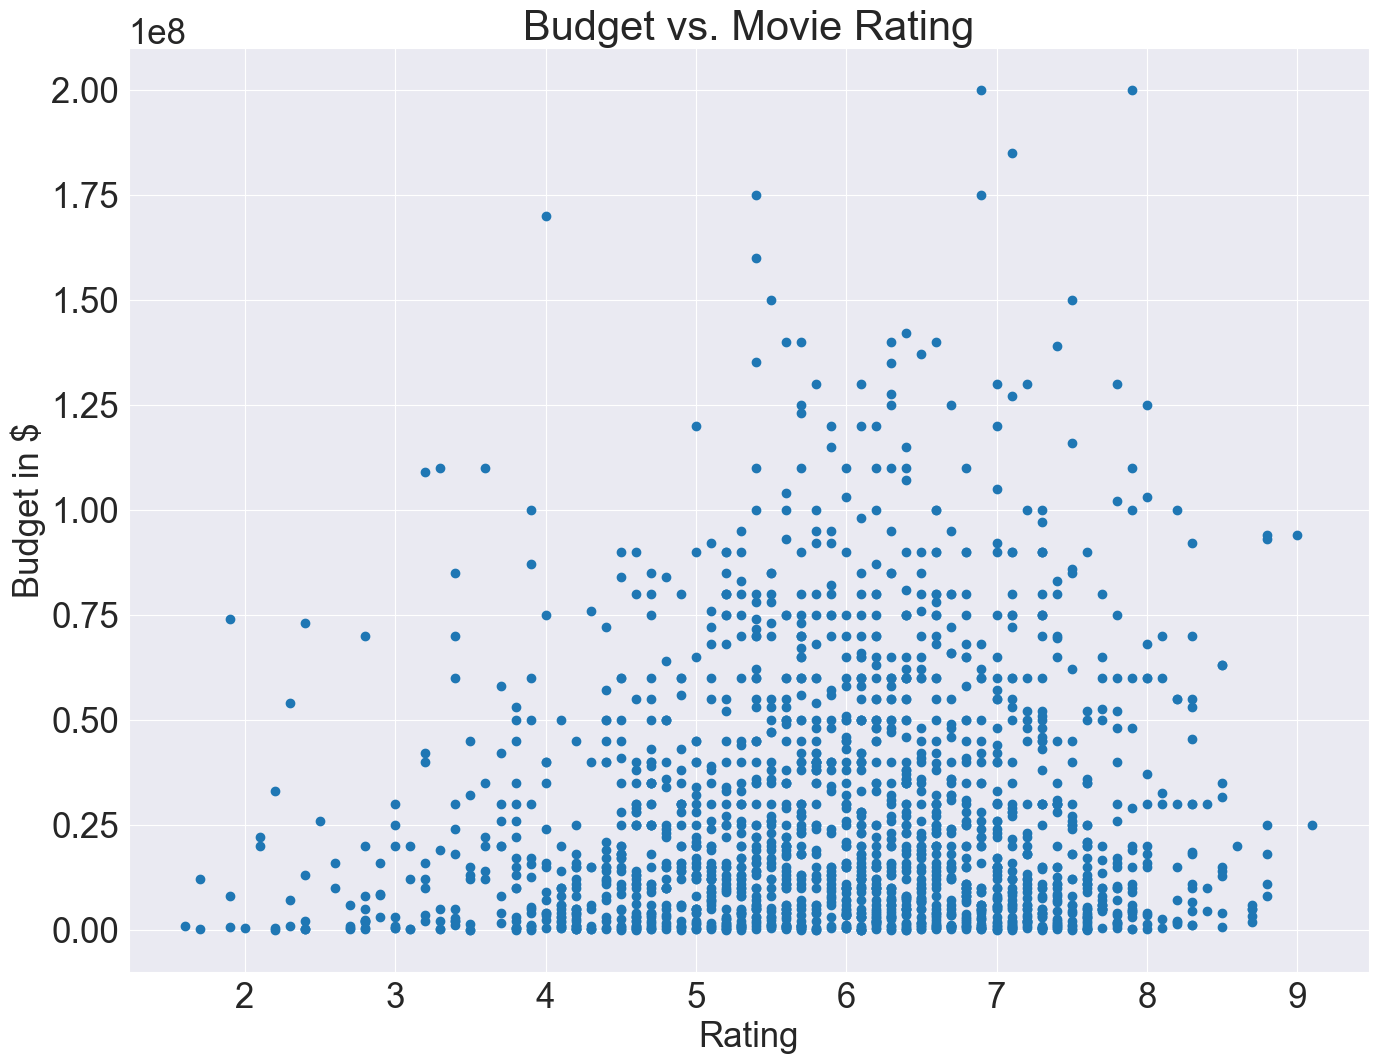

In [35]:
# Plot movie rating vs budget
plt.scatter(mdsub['rating'], mdsub['budget'])
plt.xlabel("Rating")
plt.ylabel("Budget in $")
plt.title("Budget vs. Movie Rating")
plt.show()

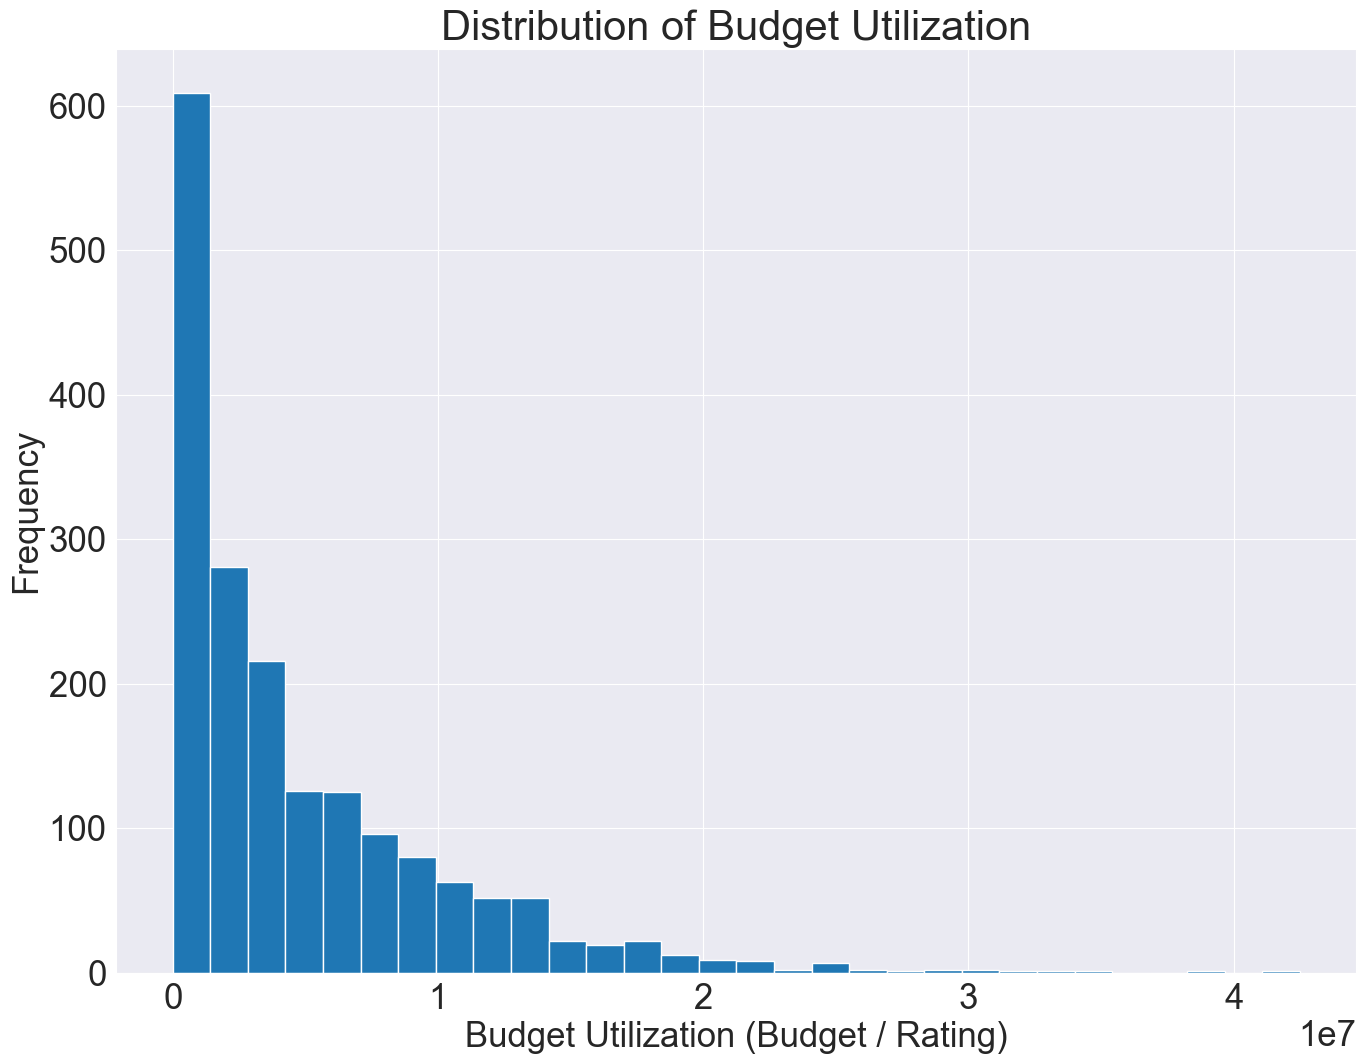

In [36]:
# Utilization of the budget in terms of rating
ratio = mdsub['budget'] / mdsub['rating']  # better utilization = lower ratio

plt.hist(ratio, bins=30)
plt.xlabel("Budget Utilization (Budget / Rating)")
plt.ylabel("Frequency")
plt.title("Distribution of Budget Utilization")
plt.show()

In [37]:
# Find the movie with the worst budget utilization
worst_budget_utilization_movie = mdsub.loc[ratio.idxmax()]
print("Movie with Worst Budget Utilization:", worst_budget_utilization_movie['title'])

Movie with Worst Budget Utilization: Wild Wild West


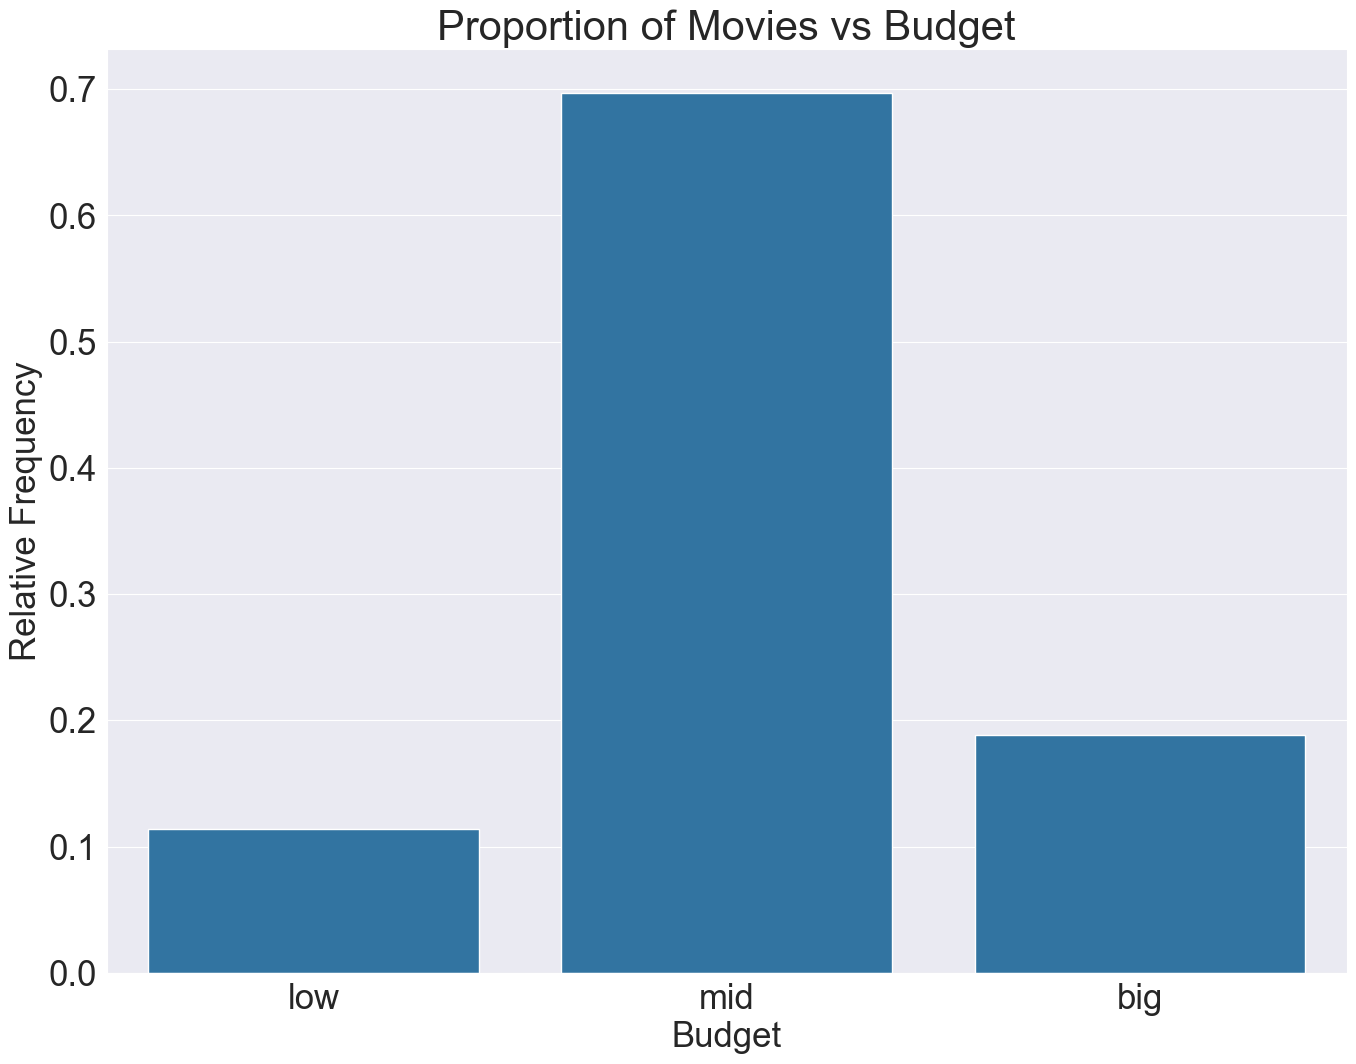

In [38]:
# Discretize budgets into categories: low, mid, and big
budget_bins = [0, 1000000, 50000000, 500000000]
budget_labels = ["low", "mid", "big"]
mdsub['disbudget'] = pd.cut(mdsub['budget'], bins=budget_bins, labels=budget_labels)

# Proportion of movies vs budget categories
budget_counts = mdsub['disbudget'].value_counts(normalize=True)
sns.barplot(x=budget_counts.index, y=budget_counts.values)
plt.xlabel("Budget")
plt.ylabel("Relative Frequency")
plt.title("Proportion of Movies vs Budget")
plt.show()

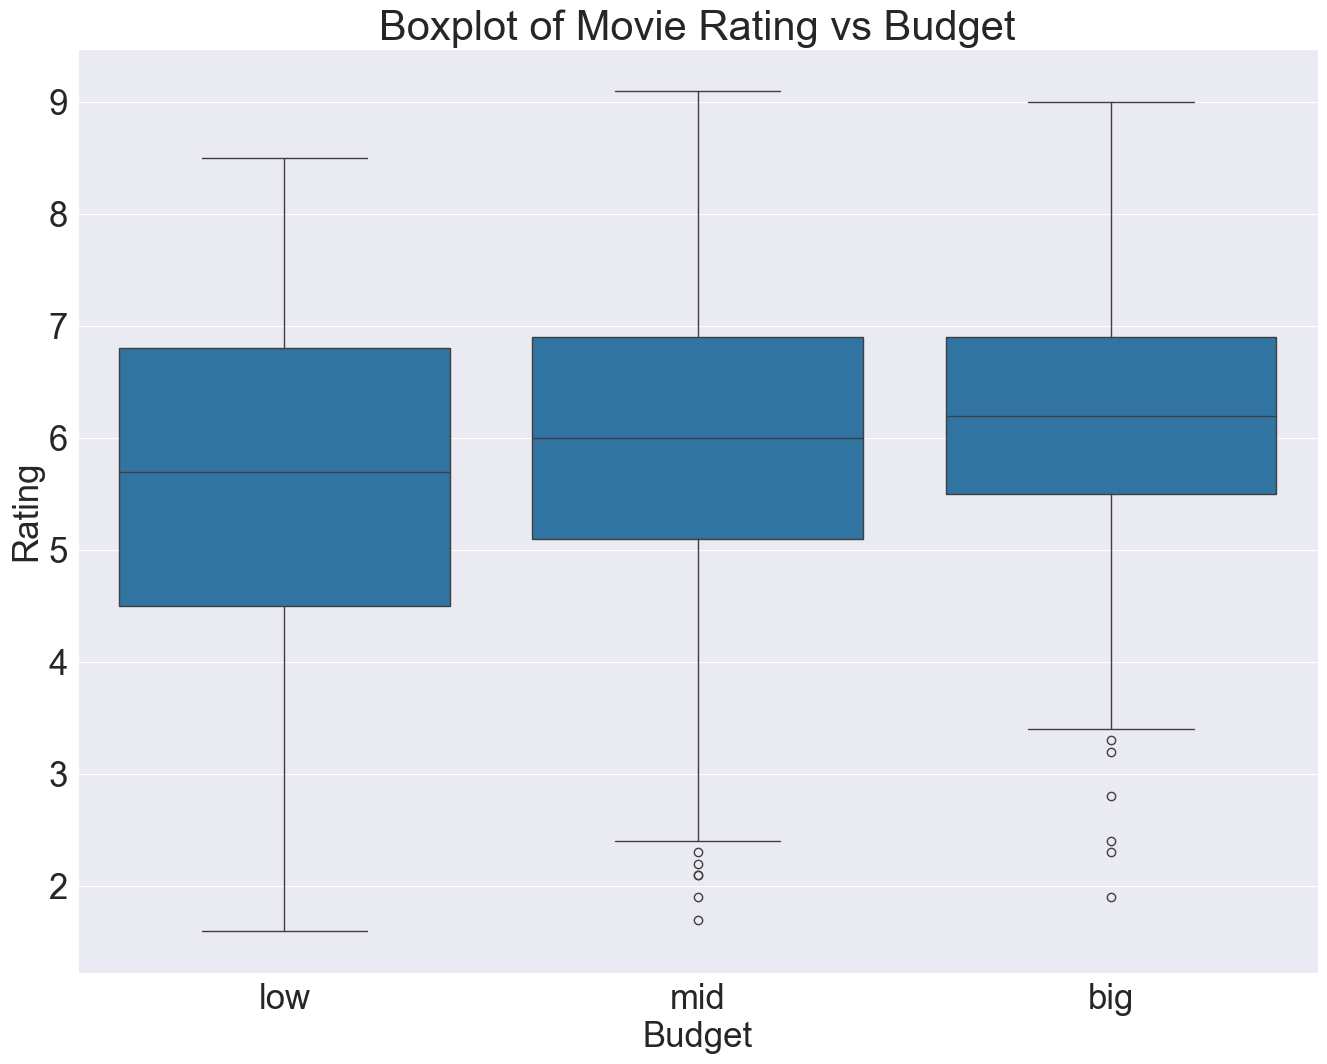

In [39]:
# Side-by-side boxplots of ratings grouped by budget categories
sns.boxplot(x=mdsub['disbudget'], y=mdsub['rating'])
plt.xlabel("Budget")
plt.ylabel("Rating")
plt.title("Boxplot of Movie Rating vs Budget")
plt.show()

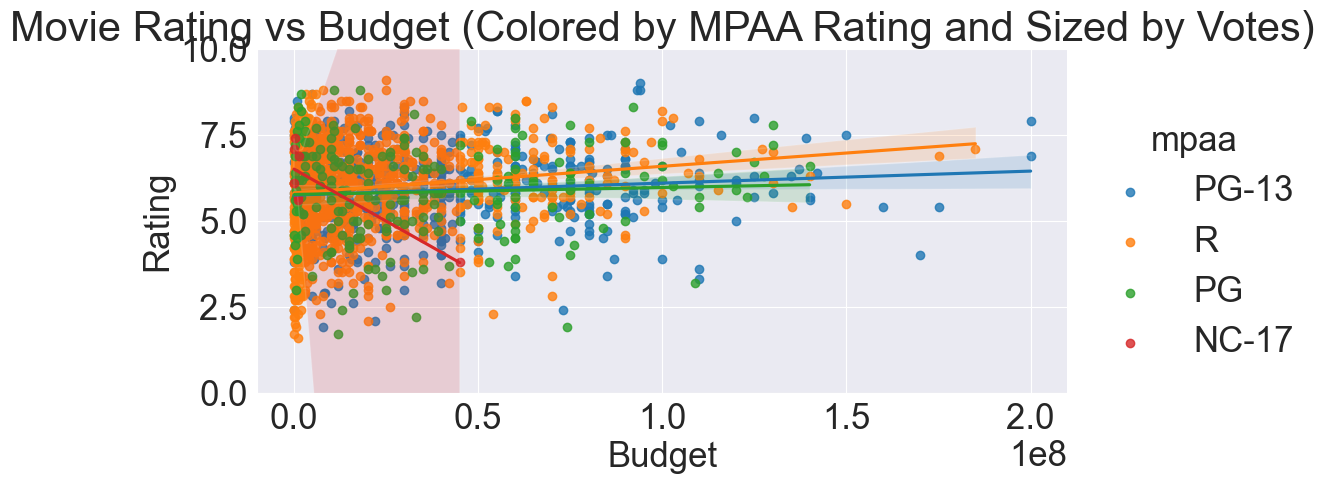

In [40]:
# Is this dependent on the mpaa?
sns.lmplot(x='budget', y='rating', hue='mpaa', data=mdsub, aspect=2)
plt.ylim(0, 10)
plt.xlabel("Budget")
plt.ylabel("Rating")
plt.title("Movie Rating vs Budget (Colored by MPAA Rating and Sized by Votes)")

# Display the plot
plt.show()


# EXAMPLE 7
What is the average movie budget for each year from 1990 to 2000?
What is the cumulative movie budget for each year from 1990 to 2000?
(consider only those movies for which information on the budget is available!)


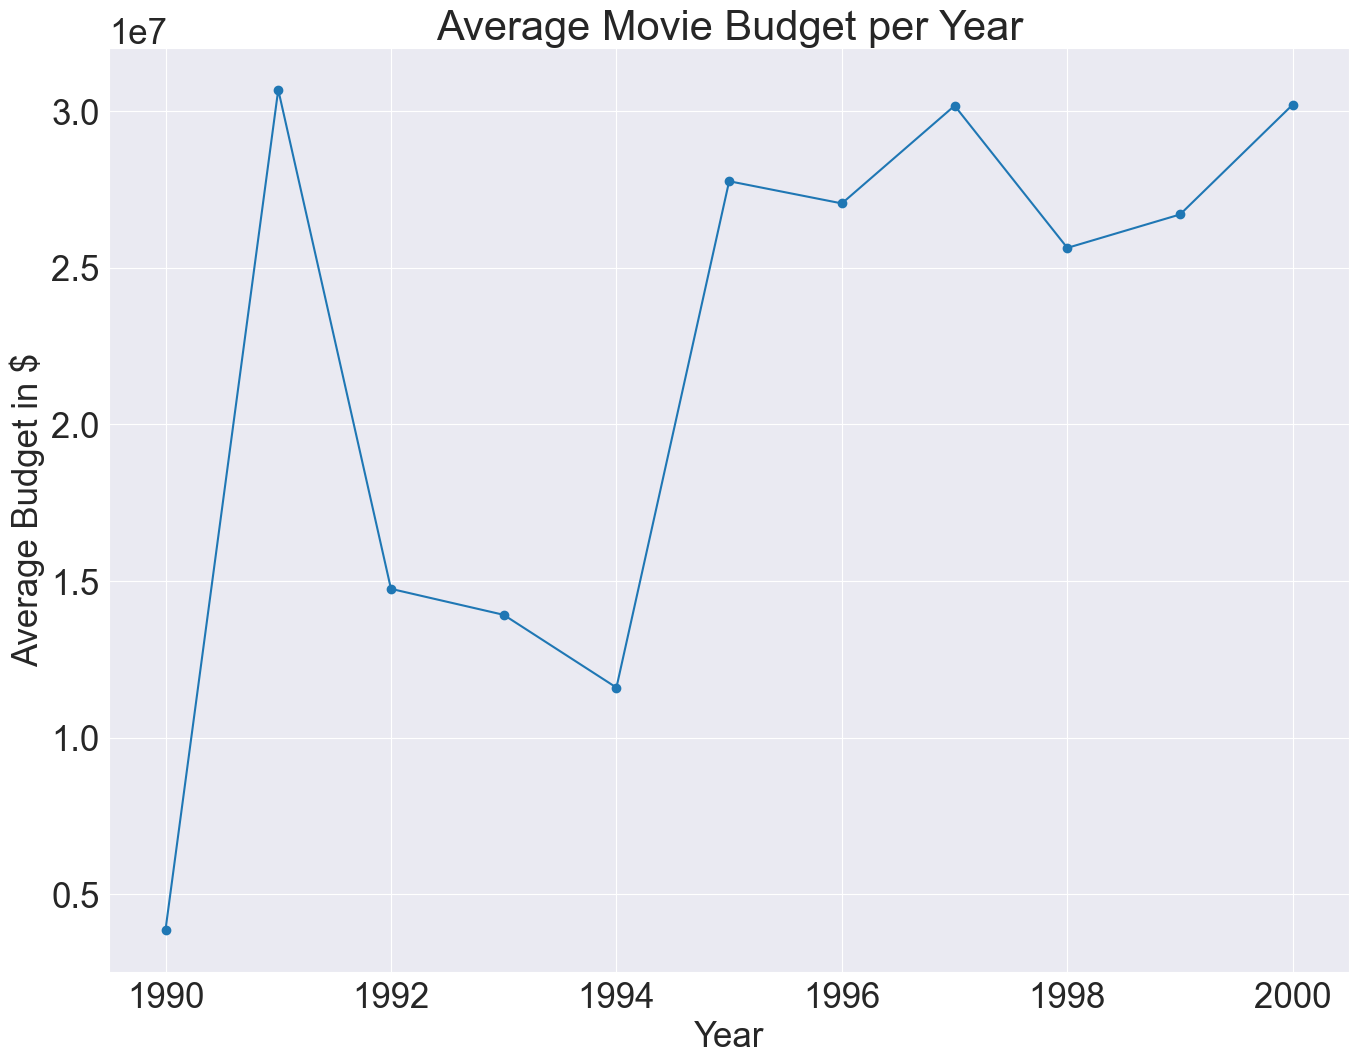

In [41]:
# Select the movies that contain information on their budgets
sel = md['budget'].notna() & (md['year'] >= 1990) & (md['year'] <= 2000)

# Calculate average budget per year
average_budget = md[sel].groupby('year')['budget'].mean()

# Plot average movie budget per year
plt.plot(average_budget.index, average_budget.values, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Average Budget in $")
plt.title("Average Movie Budget per Year")
plt.grid(True)
plt.show()

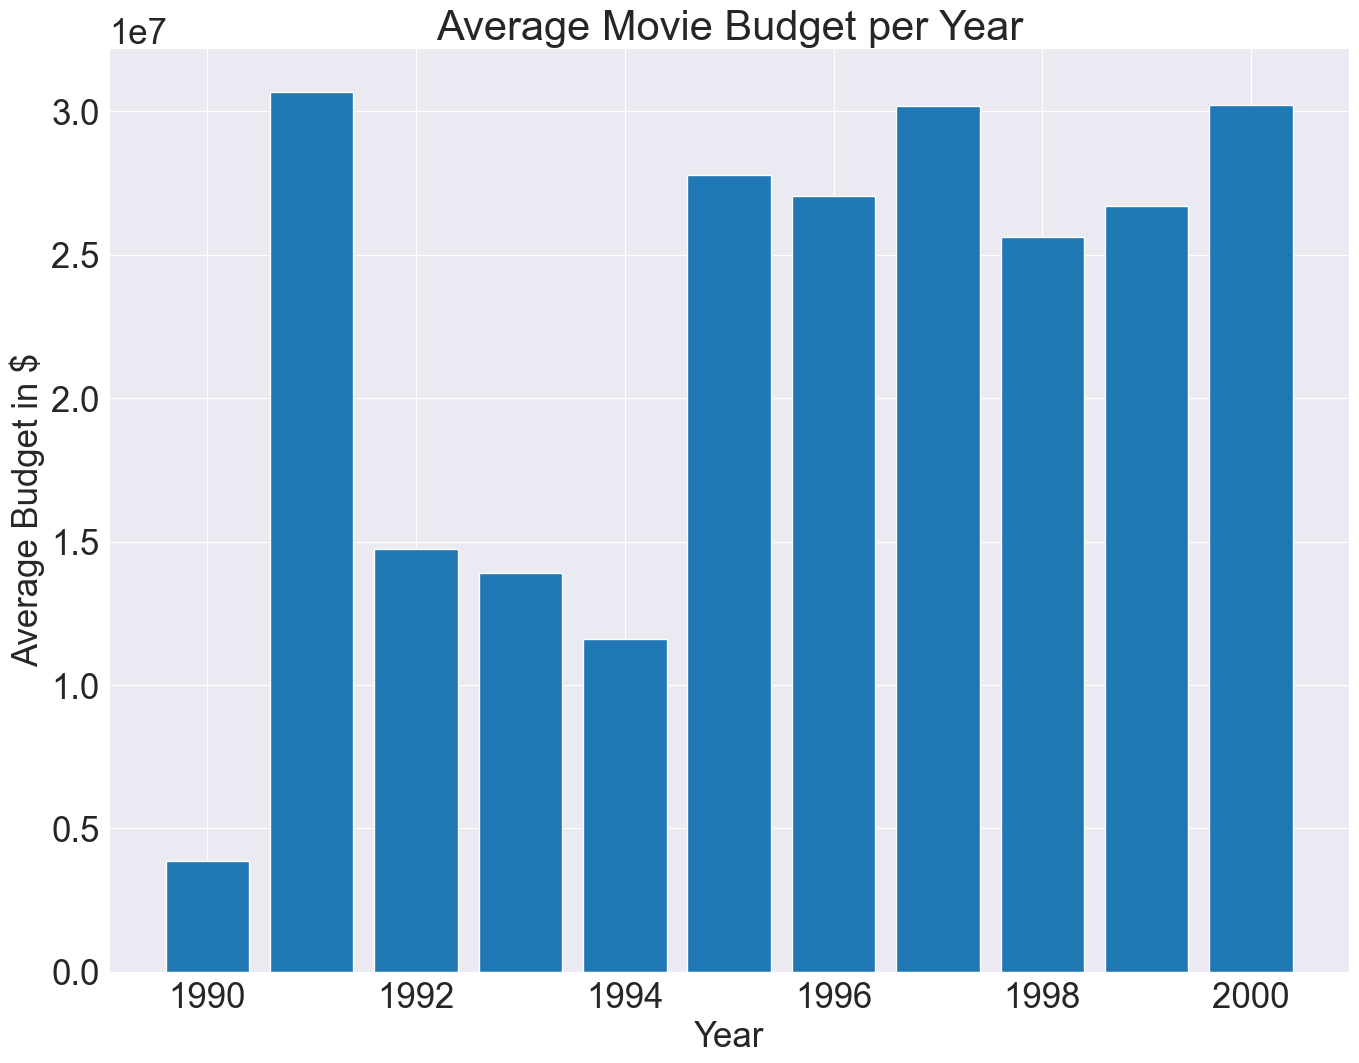

In [42]:
# Using Pandas groupby and mean
average_budget2 = md[sel].groupby('year')['budget'].mean()
plt.bar(average_budget2.index, average_budget2.values)
plt.xlabel("Year")
plt.ylabel("Average Budget in $")
plt.title("Average Movie Budget per Year")
plt.show()

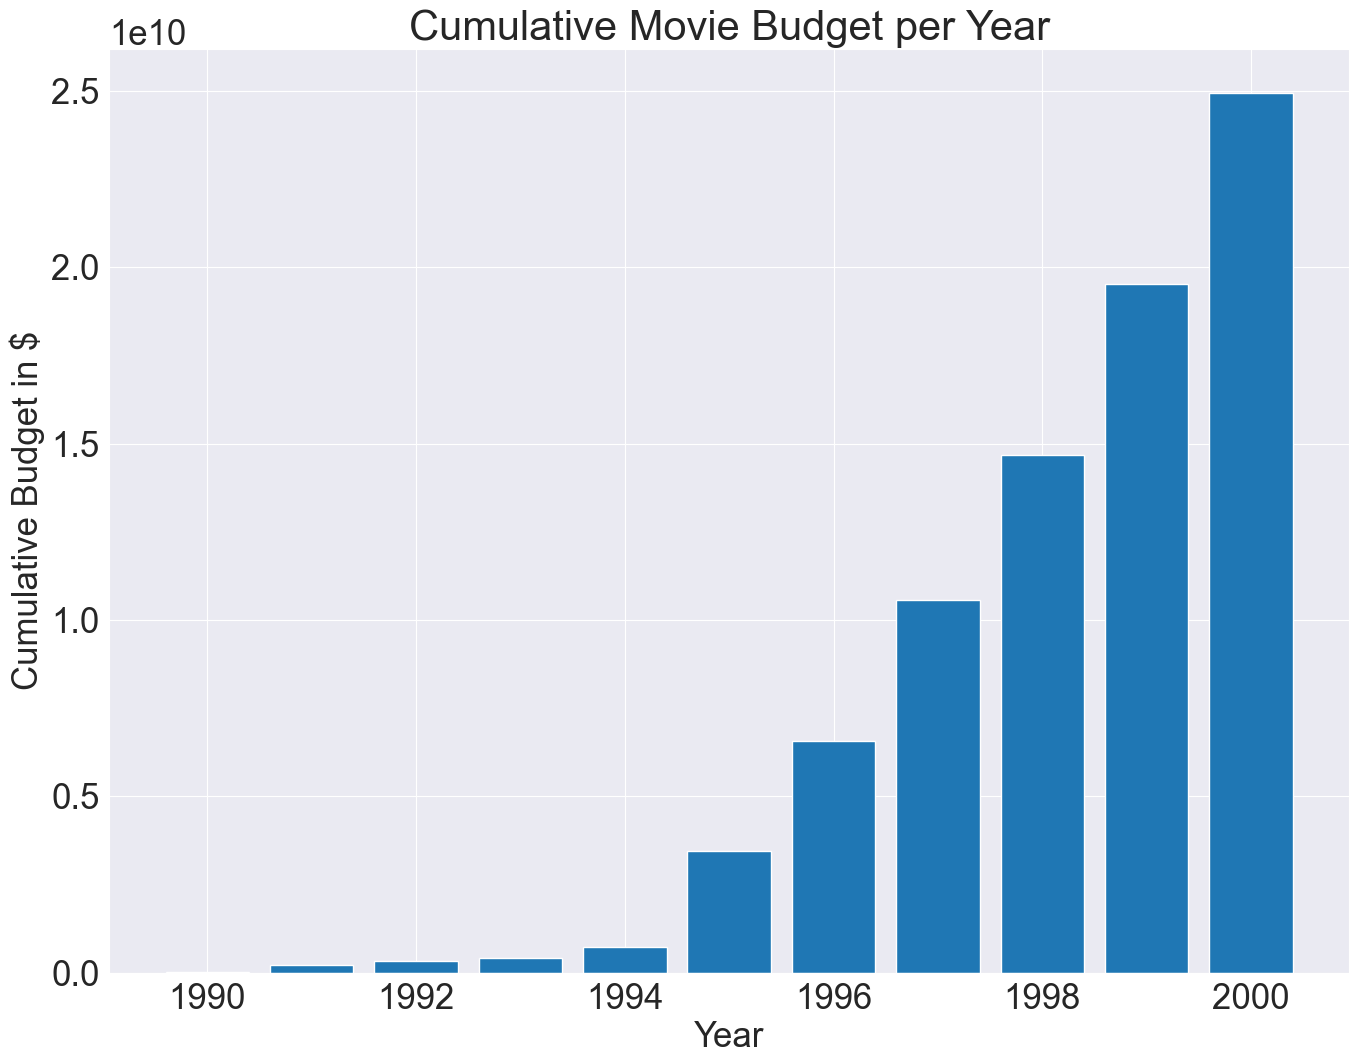

In [43]:
# Using Pandas groupby and cumsum
cumulative_budget = md[sel].groupby('year')['budget'].sum().cumsum()
plt.bar(cumulative_budget.index, cumulative_budget.values)
plt.xlabel("Year")
plt.ylabel("Cumulative Budget in $")
plt.title("Cumulative Movie Budget per Year")
plt.show()

# EXAMPLE 8
What is the average height for each season in the period from 1970 to 2000?


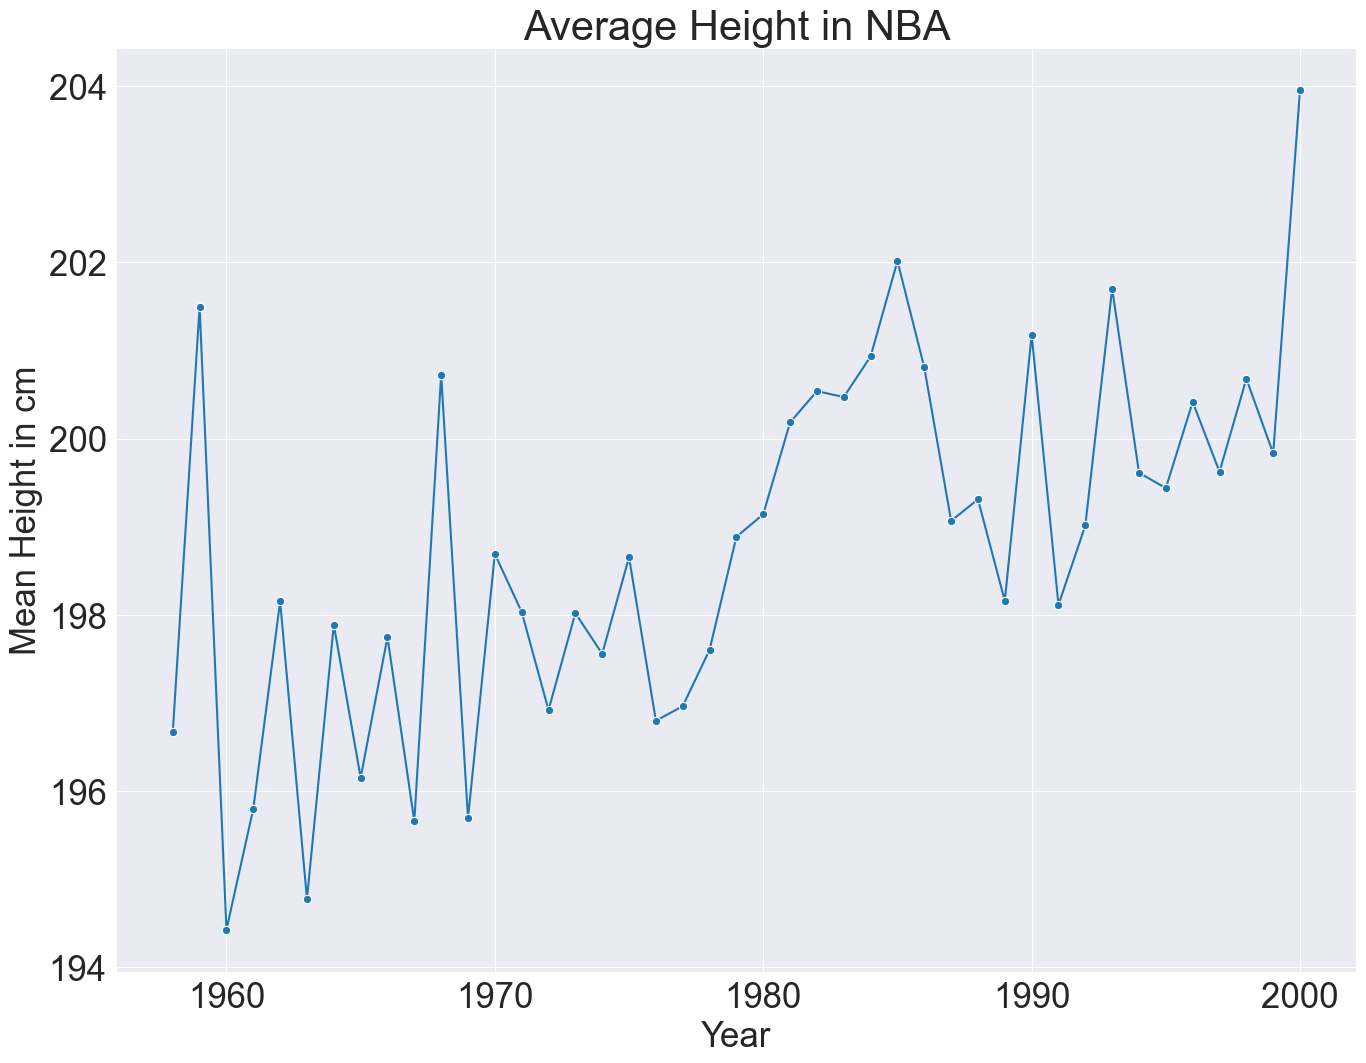

In [52]:
# Players
players = pd.read_csv('players.txt')

# Filter players within the specified year range
active_players = players[(players['firstseason'] <= 2000) & (players['lastseason'] >= 1970)]

# Calculate the mean height for each year and create a DataFrame
height_df = active_players.groupby('firstseason')['height'].mean().reset_index()
height_df.rename({'firstseason': 'year'}, inplace=True)
height_df.columns = ["year", "mean_height"]

# Plot the resulting data
sns.lineplot(data=height_df, x='year', y='mean_height', marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Mean Height in cm")
plt.title("Average Height in NBA")
plt.grid(True)
plt.show()

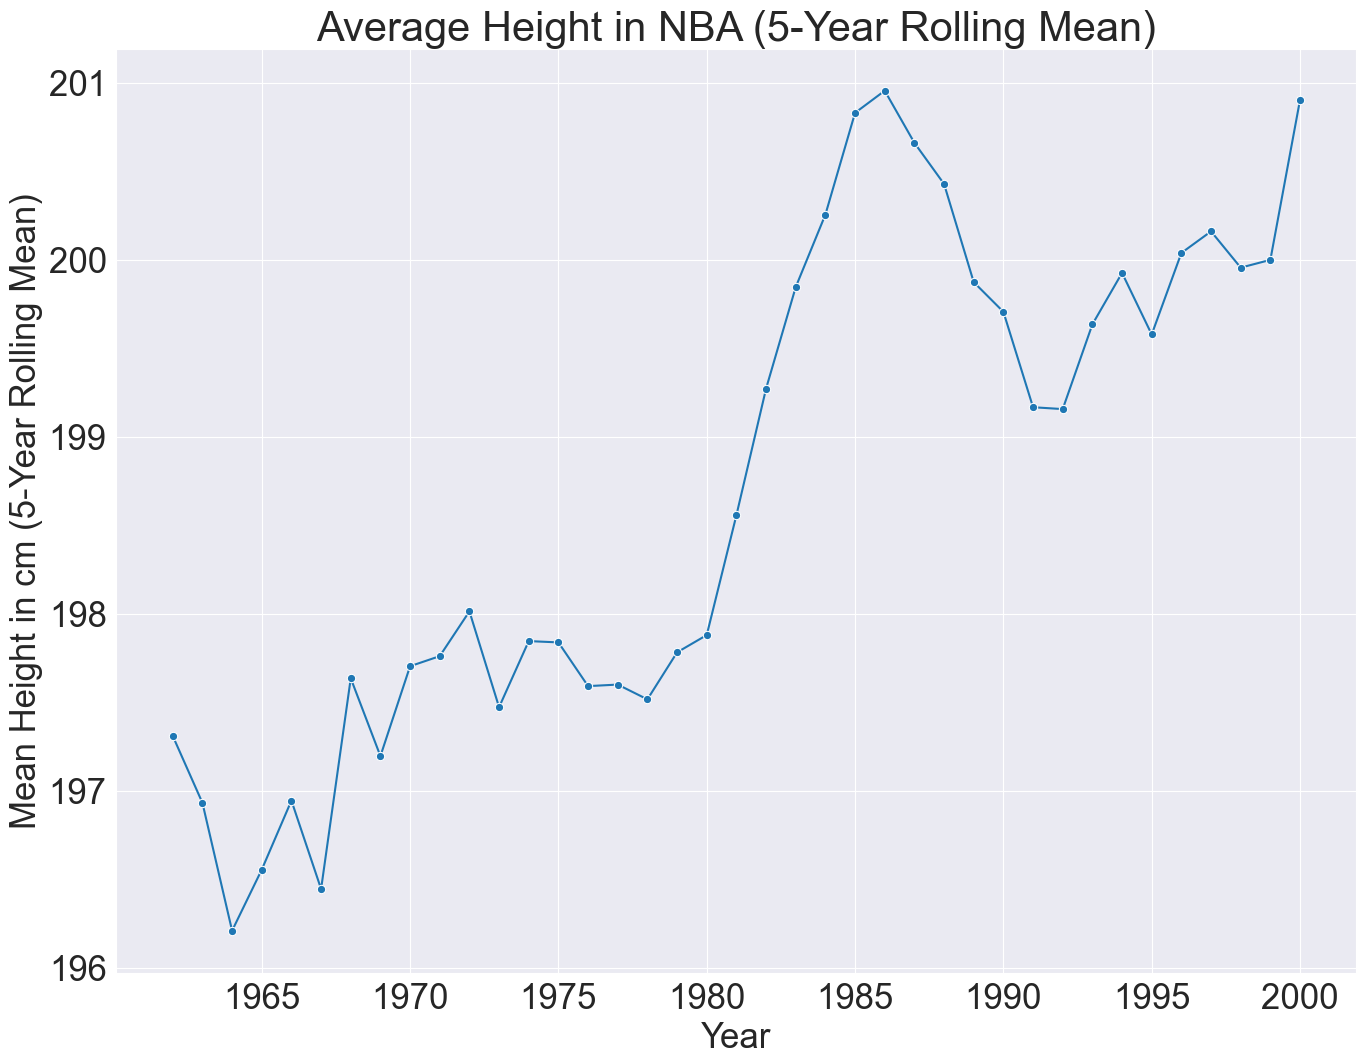

In [53]:
# Using Seaborn and Pandas with groupby and rolling mean
rolling_mean_height = height_df['mean_height'].rolling(window=5).mean()
sns.lineplot(data=height_df, x='year', y=rolling_mean_height, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Mean Height in cm (5-Year Rolling Mean)")
plt.title("Average Height in NBA (5-Year Rolling Mean)")
plt.grid(True)
plt.show()